# Pràctica 1 - Xarxes Neuronals i Deep Learning

#### Document realitzat pels alumnes Pau Prat i Violeta Bonet, del grau en Inteligència Artificial (UPC).

En primer lloc, cal destacar que aquesta primera cel·la conté tots els mòduls i llibreries necessàries per a l'execució del codi. 

Per tant, en cas de no tenir-les, caldrà executar aquesta cel·la prèviament.

In [1]:
'''
%pip install --upgrade pip  --quiet
%pip install pandas  --upgrade --quiet
%pip install numpy  --upgrade --quiet
%pip install scipy  --upgrade --quiet
%pip install statsmodels  --upgrade --quiet
%pip install seaborn  --upgrade --quiet
%pip install scikit-learn==1.3.0
%pip install tqdm ipykernel matplotlib ipywidgets --upgrade --quiet   
%pip install plotly numpy==1.25 nbformat umap-learn
%pip install ucimlrepo
%pip install mlxtend
%pip install pydotplus
%pip install imbalanced-learn
%pip install yellowbrick
%pip install missingno
%pip install tensorflow
%load_ext autoreload
'''

'\n%pip install --upgrade pip  --quiet\n%pip install pandas  --upgrade --quiet\n%pip install numpy  --upgrade --quiet\n%pip install scipy  --upgrade --quiet\n%pip install statsmodels  --upgrade --quiet\n%pip install seaborn  --upgrade --quiet\n%pip install scikit-learn==1.3.0\n%pip install tqdm ipykernel matplotlib ipywidgets --upgrade --quiet   \n%pip install plotly numpy==1.25 nbformat umap-learn\n%pip install ucimlrepo\n%pip install mlxtend\n%pip install pydotplus\n%pip install imbalanced-learn\n%pip install yellowbrick\n%pip install missingno\n%pip install tensorflow\n%load_ext autoreload\n'

Imports bàsics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Definim la mida predeterminada dels gràfics

In [3]:
plt.rcParams['figure.figsize'] = [9, 6]  

plt.rcParams['font.size'] = 14

sns.set(font_scale=1)

# 1. Anàlisi Exploratòria de Dades (EDA)

#### <span style="color:lightgreen"> Carreguem la base de dades</span>

In [4]:
df = pd.read_csv("smartphone_data.csv")

df.shape

(980, 25)

In [5]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [6]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


In [7]:
def classify_features(df, target): 
    initial_numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    initial_categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    numerical_features = []
    categorical_features = initial_categorical_features  

    for column in initial_numerical_features:
        if column != target:
            if df[column].nunique() < 10:
                categorical_features.append(column) 
            else:
                numerical_features.append(column)  

    def feature_type(column):
        if column in numerical_features:
            return 'Numerical'
        elif column in categorical_features:
            return 'Categorical'
        else:
            return 'Boolean'

    features = pd.DataFrame({
        'Feature': [column for column in df.columns if column != 'price'],
        'Type': [df[column].dtype for column in df.columns if column != 'price'],
        'Unique values': [df[column].nunique() for column in df.columns if column != 'price'],
        'Category': [feature_type(column) for column in df.columns if column != 'price']
    })

    features.sort_values(by='Unique values', ascending=True, inplace=True)
    return numerical_features, categorical_features, features

numerical_features, categorical_features, features = classify_features(df, 'price')

features

,Feature,Type,Unique values,Category
18,num_front_cameras,float64,2,Categorical
22,extended_memory_available,int64,2,Categorical
3,has_5g,bool,2,Boolean
4,has_nfc,bool,2,Boolean
5,has_ir_blaster,bool,2,Boolean
10,fast_charging_available,int64,2,Categorical
7,num_cores,float64,3,Categorical
19,os,object,3,Categorical
17,num_rear_cameras,int64,4,Categorical
15,refresh_rate,int64,6,Categorical


In [8]:
for variable in ['has_5g', 'has_nfc', 'has_ir_blaster']:
    df[variable] = df[variable].map({True: 1, False: 0})

In [9]:
numerical_features, categorical_features, features = classify_features(df, 'price')

features

,Feature,Type,Unique values,Category
18,num_front_cameras,float64,2,Categorical
22,extended_memory_available,int64,2,Categorical
3,has_5g,int64,2,Categorical
4,has_nfc,int64,2,Categorical
5,has_ir_blaster,int64,2,Categorical
10,fast_charging_available,int64,2,Categorical
7,num_cores,float64,3,Categorical
19,os,object,3,Categorical
17,num_rear_cameras,int64,4,Categorical
15,refresh_rate,int64,6,Categorical


In [10]:
# Eliminar 'model' de la llista de variables categòriques i de 'df'
categorical_features.remove('model')
df.drop('model', axis=1, inplace=True)

#### <span style="color:lightgreen"> Visualitzem la distribució de cada variable numèrica</span>

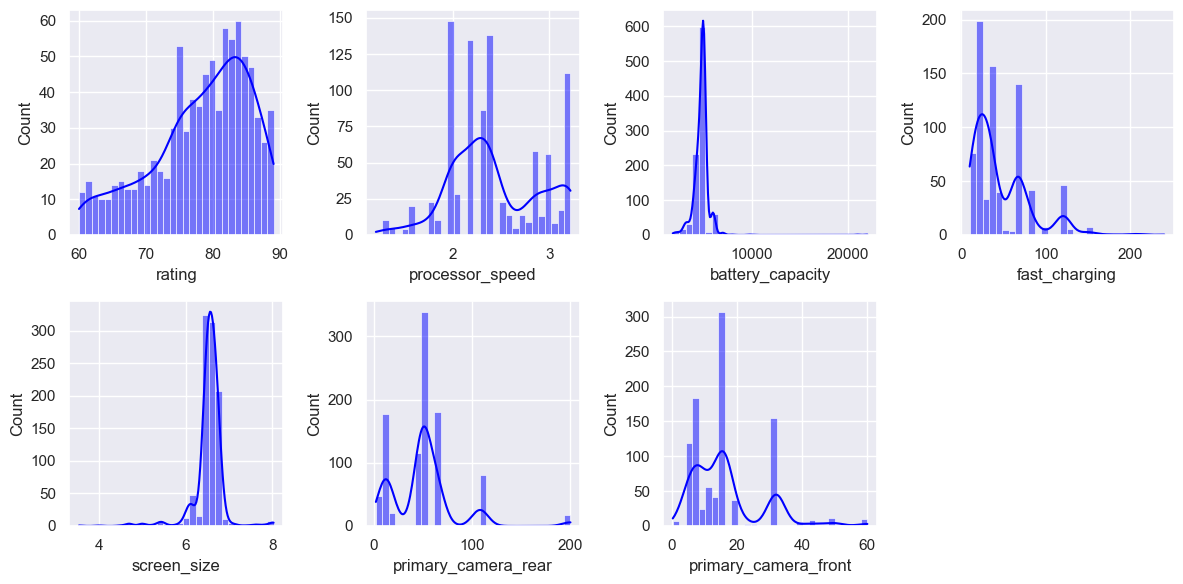

In [11]:
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize = (12, 6))
axes = axes.flatten()

for i, ax in enumerate(axes[:len(numerical_features)]):
    sns.histplot(df[numerical_features[i]], bins = 30, color = 'blue', edgecolor = 'white', kde = True, ax = ax)

# Eliminar els subplots sobrants
for ax in axes[len(numerical_features):]:
    fig.delaxes(ax)

plt.tight_layout()
#plt.savefig('./plots/num_dist.png')

En cas que es vulgui obtenir el gràfic de la distribució de cada variable numèrica per separat, simplement cal descomentar i executar la següent cel·la.

In [12]:
'''for feature in numerical_features:
    mean = df[feature].mean()
    fig, ax = plt.subplots()
    sns.histplot(df[feature], kde=False, ax=ax, edgecolor="black")
    ax.plot([mean], [-0.6], marker='^', markersize=9, color="red")
    ax.set_title(f'Distribució de {feature}')
    ax.set_xlabel(feature, size=10)
    ax.set_ylabel("Freqüència", size=10)
    plt.tight_layout()
    #plt.savefig(f'./plots/{feature}_distribution.png')'''

'for feature in numerical_features:\n    mean = df[feature].mean()\n    fig, ax = plt.subplots()\n    sns.histplot(df[feature], kde=False, ax=ax, edgecolor="black")\n    ax.plot([mean], [-0.6], marker=\'^\', markersize=9, color="red")\n    ax.set_title(f\'Distribució de {feature}\')\n    ax.set_xlabel(feature, size=10)\n    ax.set_ylabel("Freqüència", size=10)\n    plt.tight_layout()\n    #plt.savefig(f\'./plots/{feature}_distribution.png\')'

#### <span style="color:lightgreen"> Histograma de la freqüència per classe de cada variable categòrica </span>

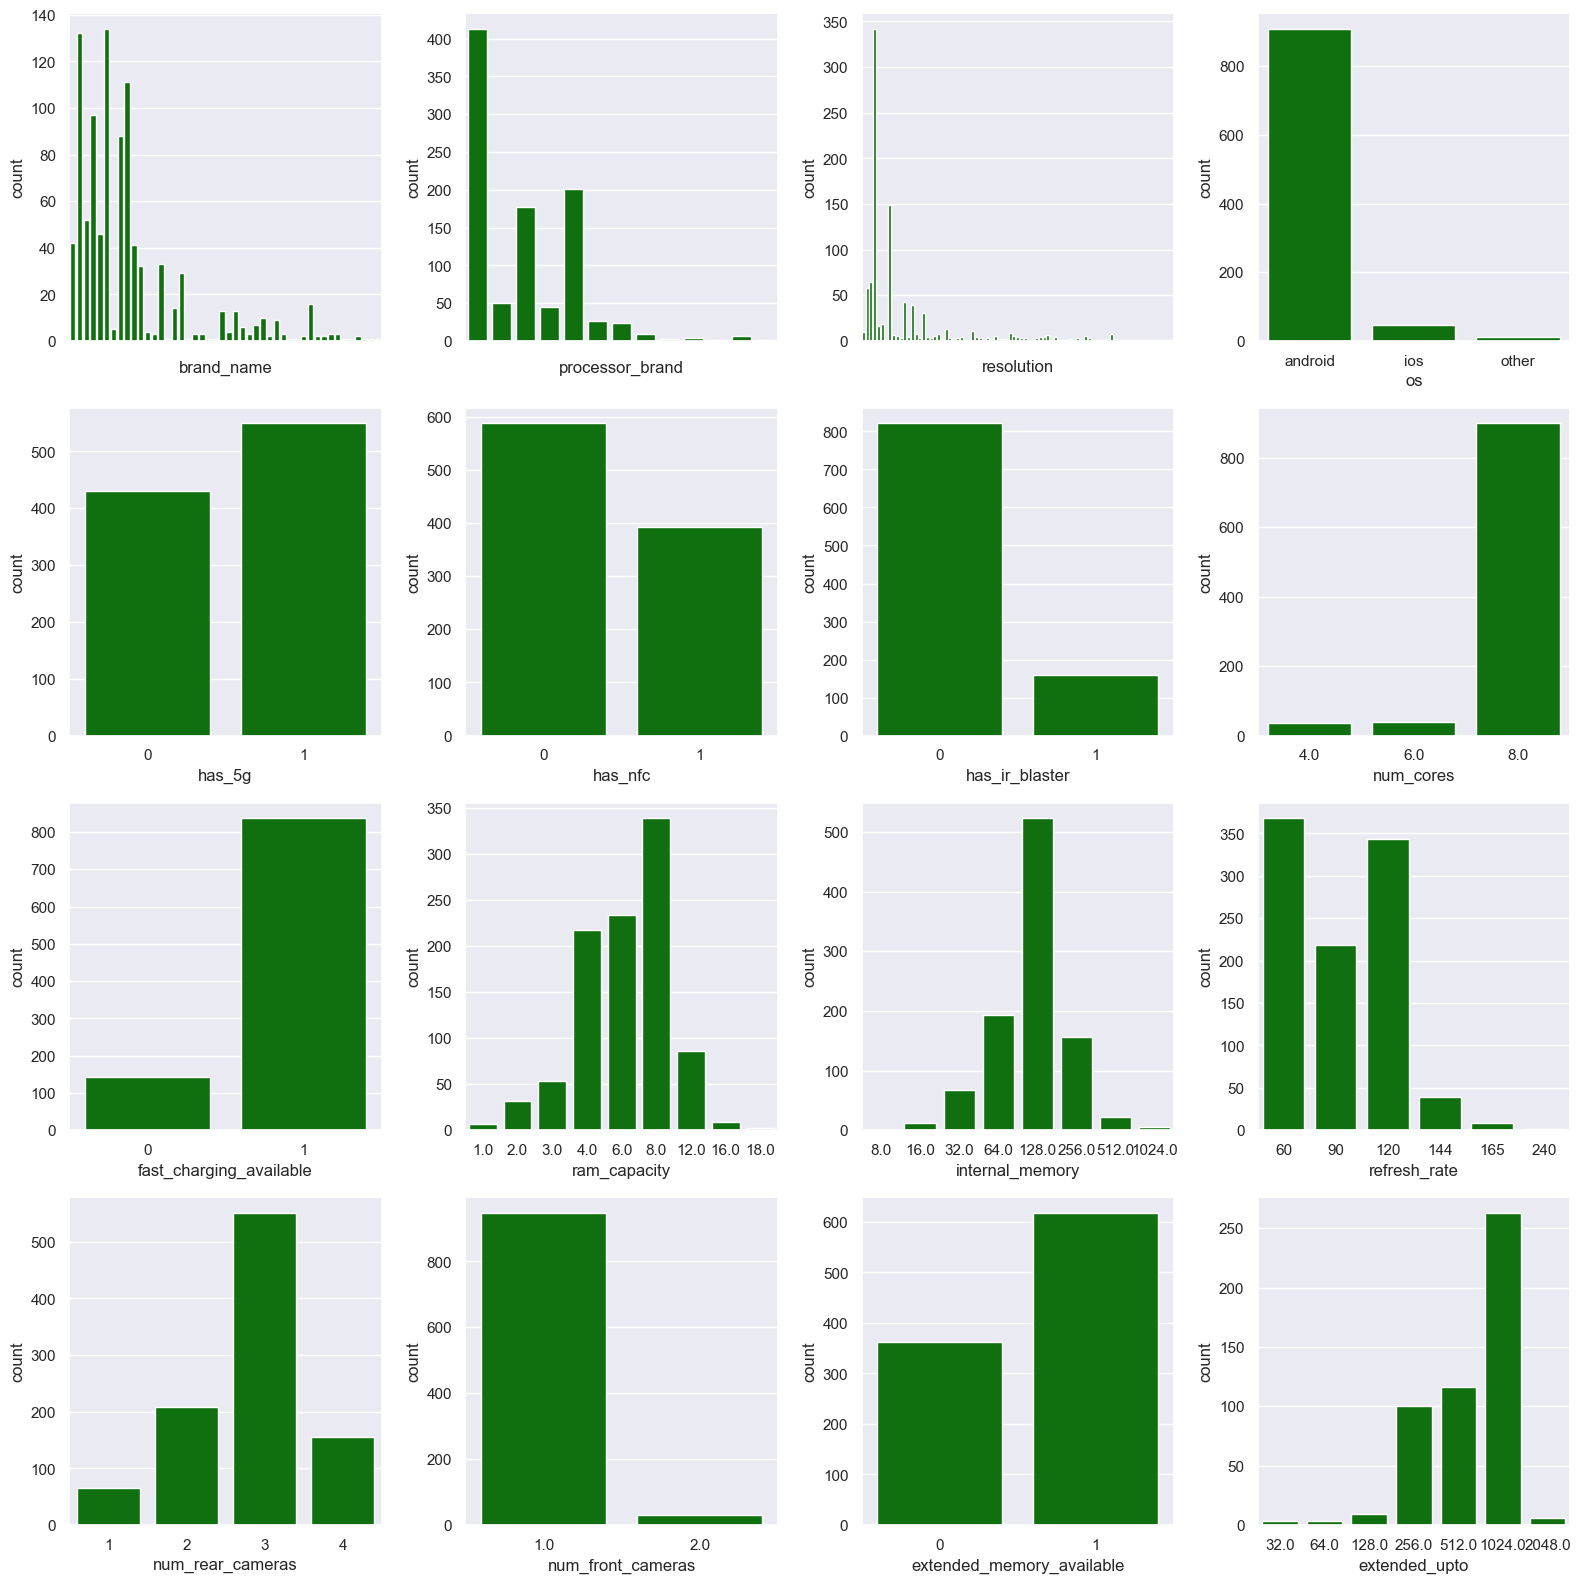

In [13]:
fig, axes = plt.subplots(4, 4, figsize = (16, 16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.countplot(data = df, x = categorical_features[i], color = 'green', ax = ax)
    if categorical_features[i] in ['resolution', 'processor_brand', 'brand_name']:
        ax.set_xticklabels([])  

plt.tight_layout()
#plt.savefig('./plots/hist_freq.png')

En cas que es vulgui obtenir el gràfic de la freqüència per classe de cada variable categòrica per separat, simplement cal descomentar i executar la següent cel·la.

In [14]:
'''for feature in categorical_features:
    plt.figure()
    df[feature].value_counts().plot(kind='bar', color='green')
    plt.title(f'Freqüència per classe - {feature}')
    if feature == 'resolution':
        plt.xticks(rotation=90, fontsize=8)  
    else:
        plt.xticks(rotation=70, fontsize=10)
    plt.tight_layout()
    #plt.savefig(f'./plots/{feature}_frequency.png')'''

"for feature in categorical_features:\n    plt.figure()\n    df[feature].value_counts().plot(kind='bar', color='green')\n    plt.title(f'Freqüència per classe - {feature}')\n    if feature == 'resolution':\n        plt.xticks(rotation=90, fontsize=8)  \n    else:\n        plt.xticks(rotation=70, fontsize=10)\n    plt.tight_layout()\n    #plt.savefig(f'./plots/{feature}_frequency.png')"

#### <span style="color:lightgreen"> Correlacions entre variables numèriques </span>

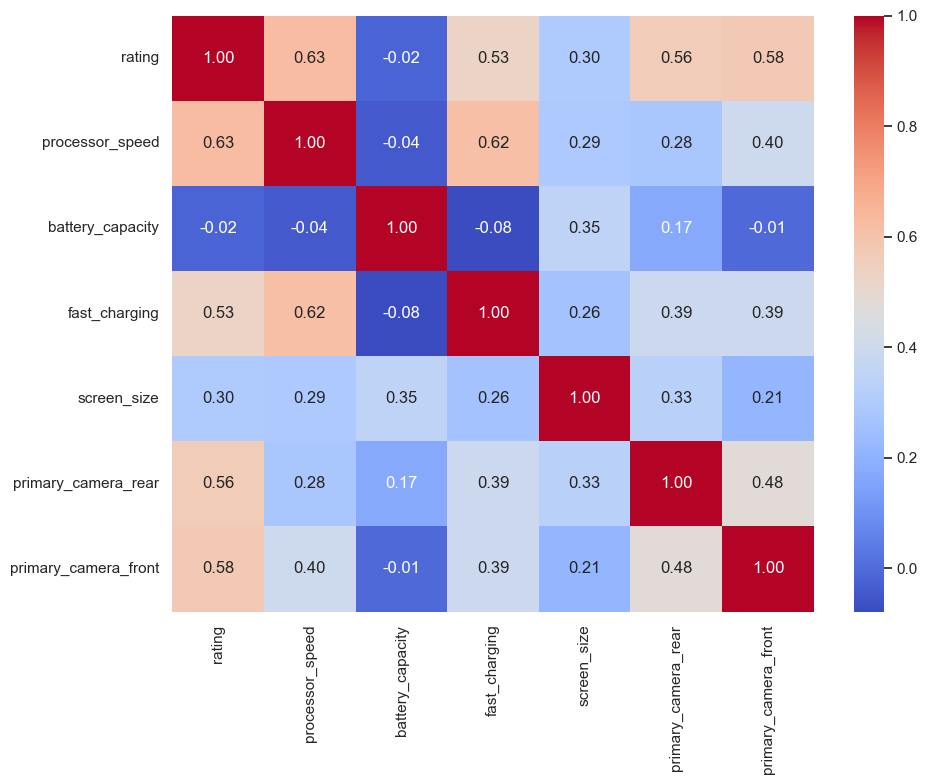

In [15]:
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.tight_layout()  
#plt.savefig('./plots/correlations_heatmap.png')
plt.show()

#### <span style="color:lightgreen"> Correlació entre variables categòriques i variable objectiu </span>

In [16]:
# Multiplicar els valors de price per 0.011
df['price'] = df['price'] * 0.011

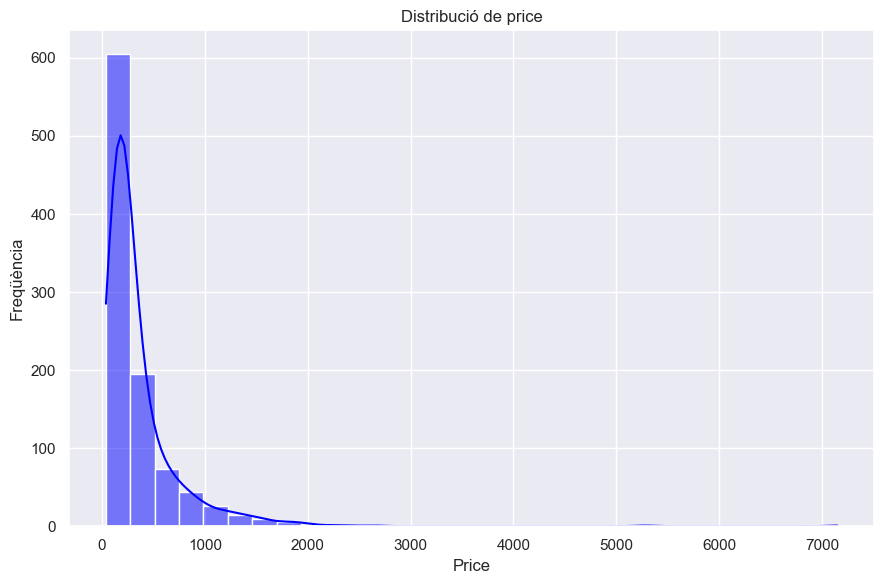

In [17]:
# Visualitzar la distribució de 'price'
plt.figure()
sns.histplot(df['price'], bins = 30, color = 'blue', edgecolor = 'white', kde = True)
plt.title('Distribució de price')
plt.xlabel('Price')
plt.ylabel('Freqüència')
plt.tight_layout()
#plt.savefig('./plots/price_distribution.png')

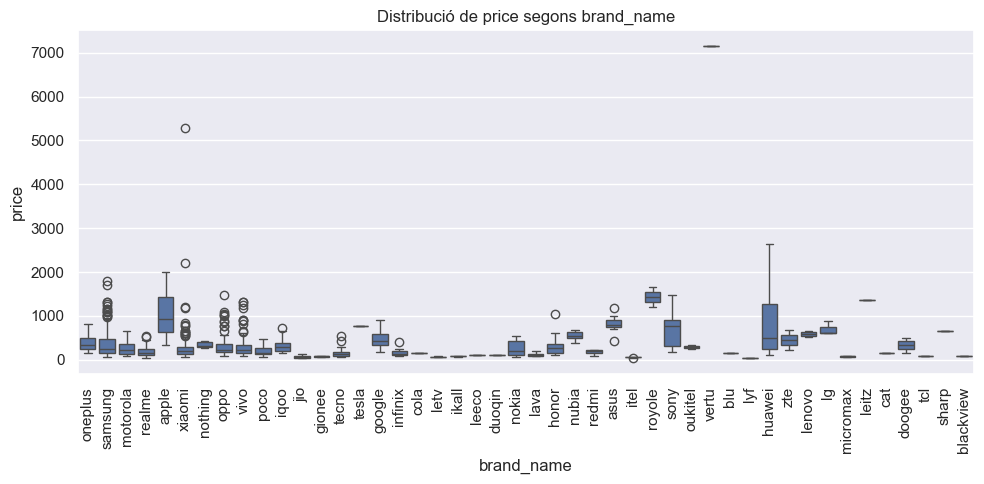

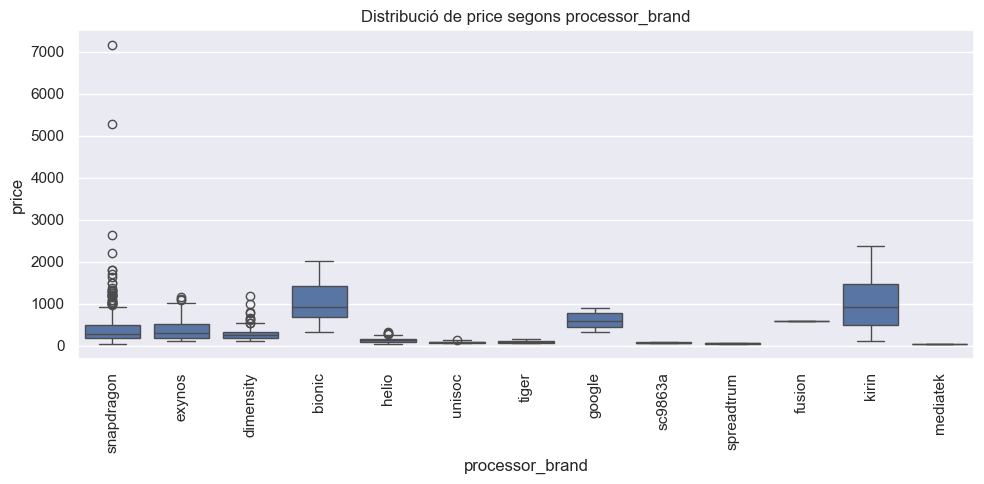

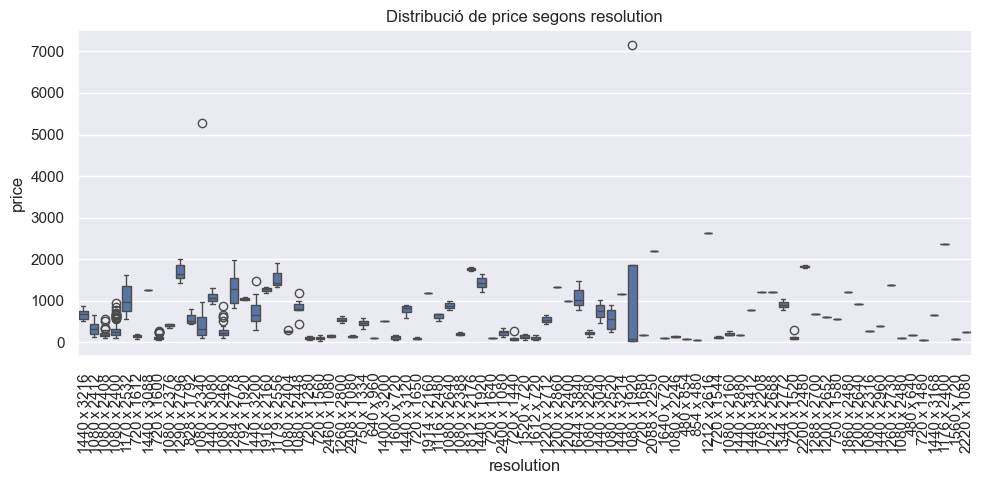

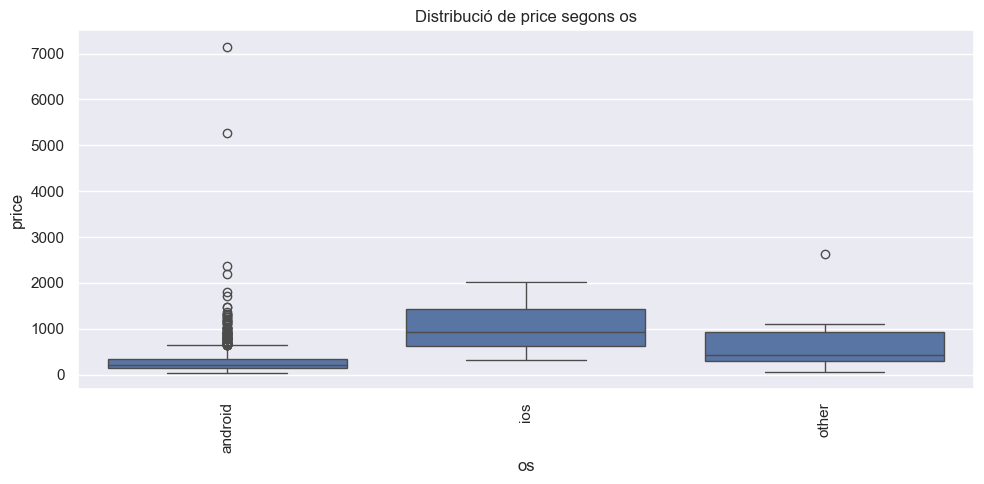

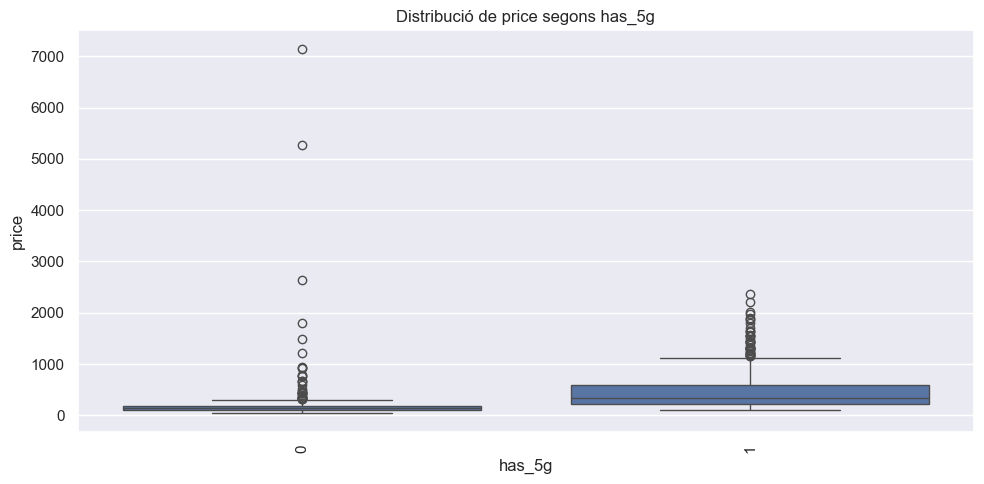

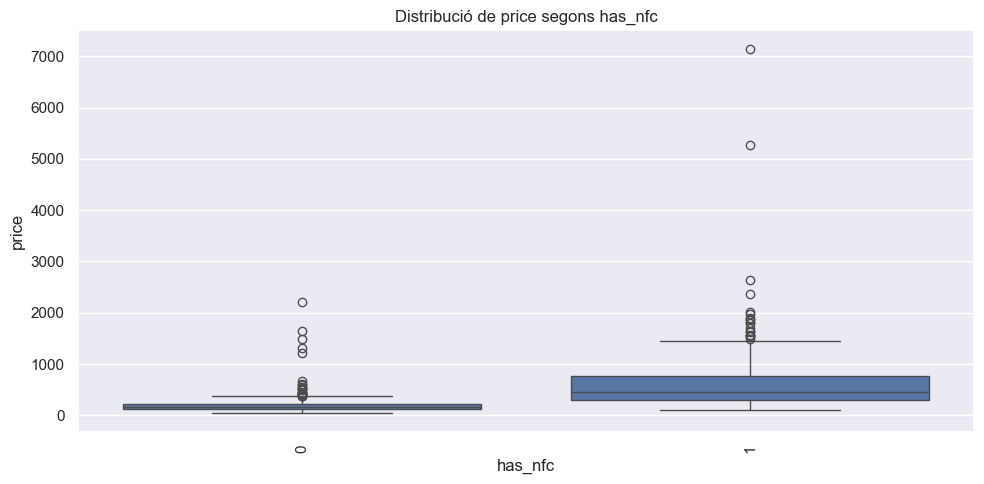

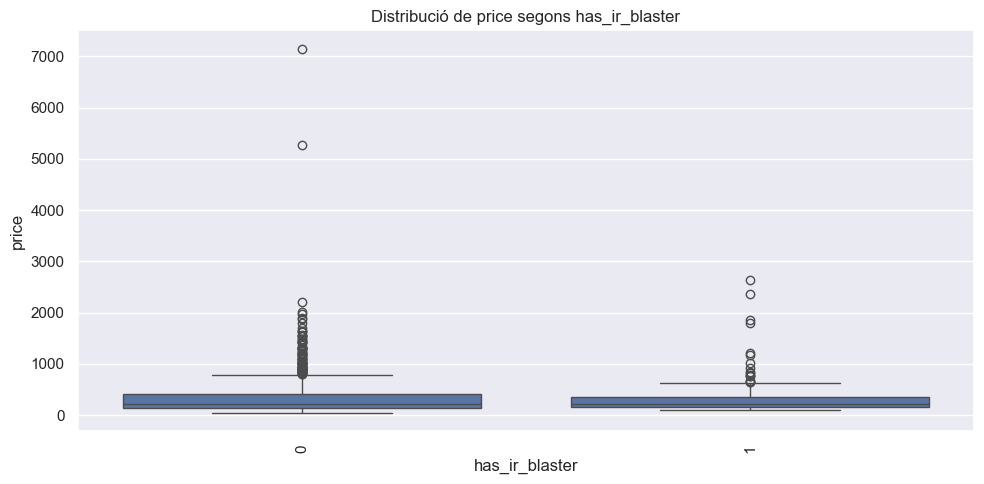

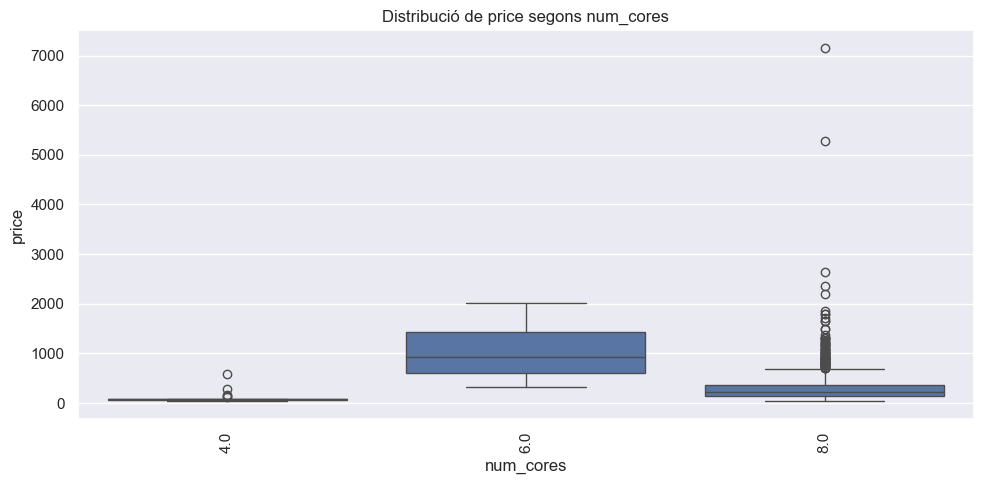

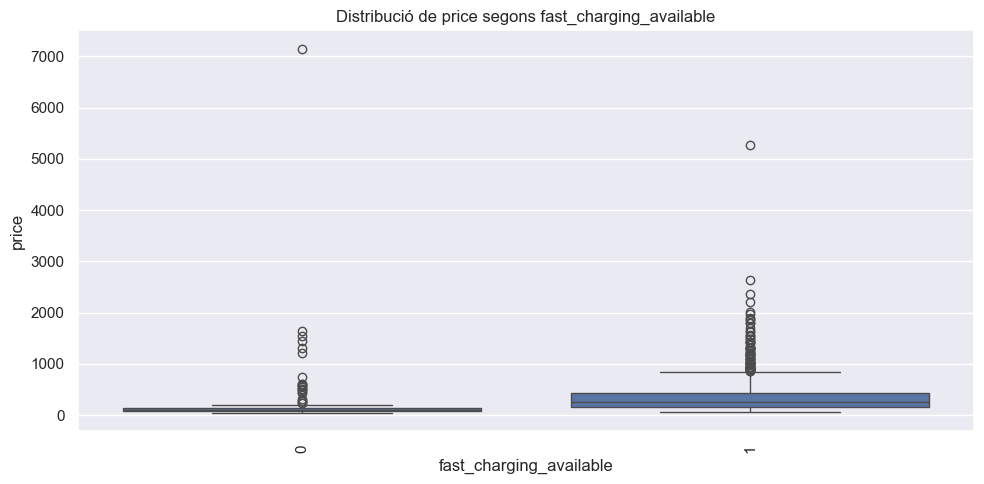

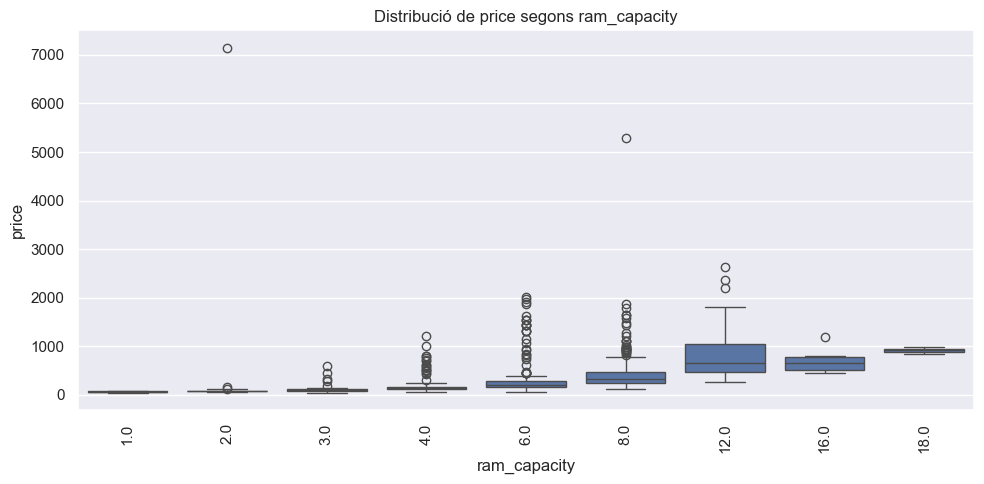

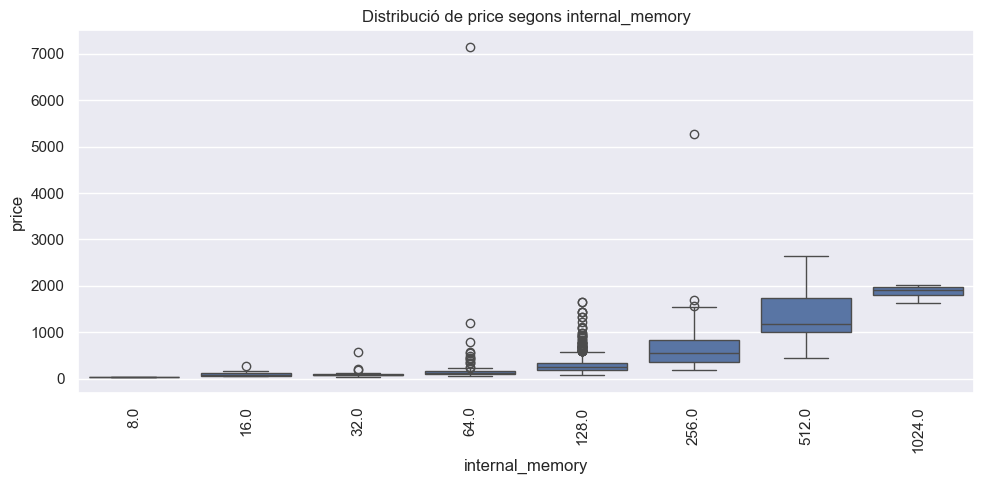

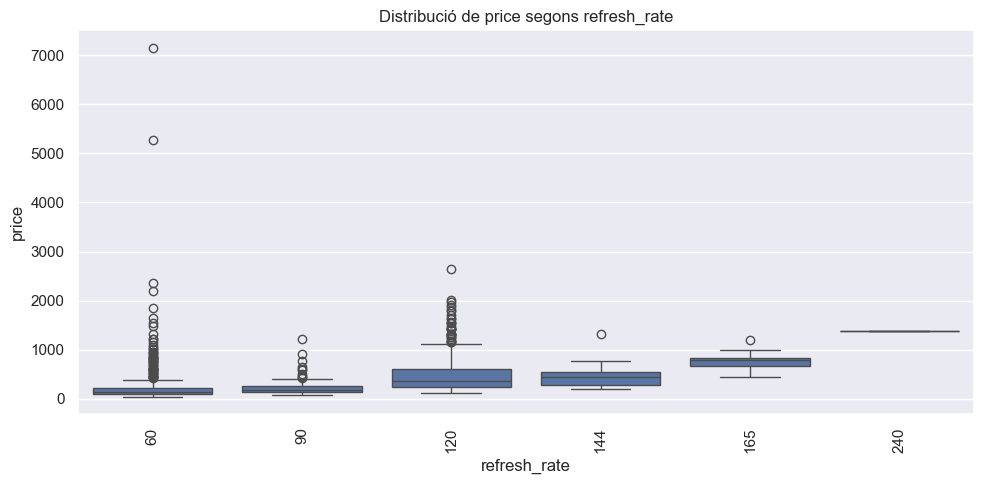

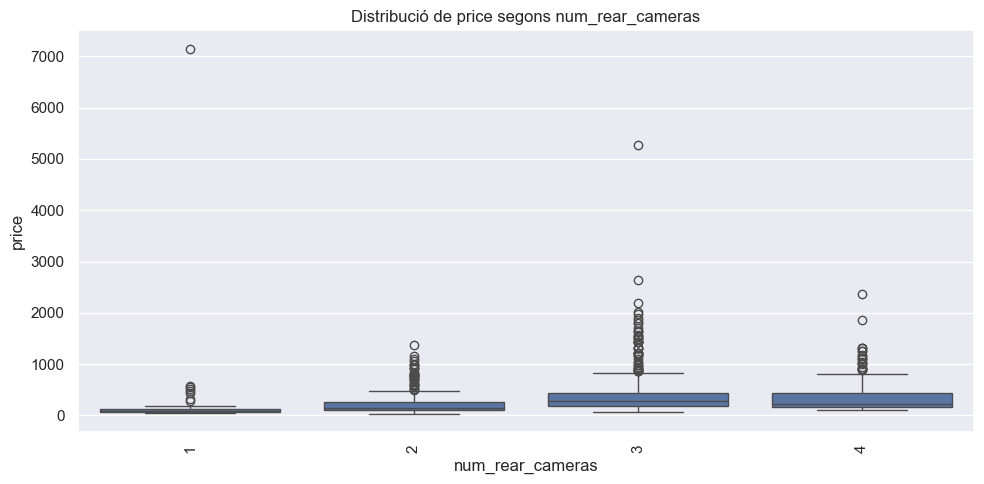

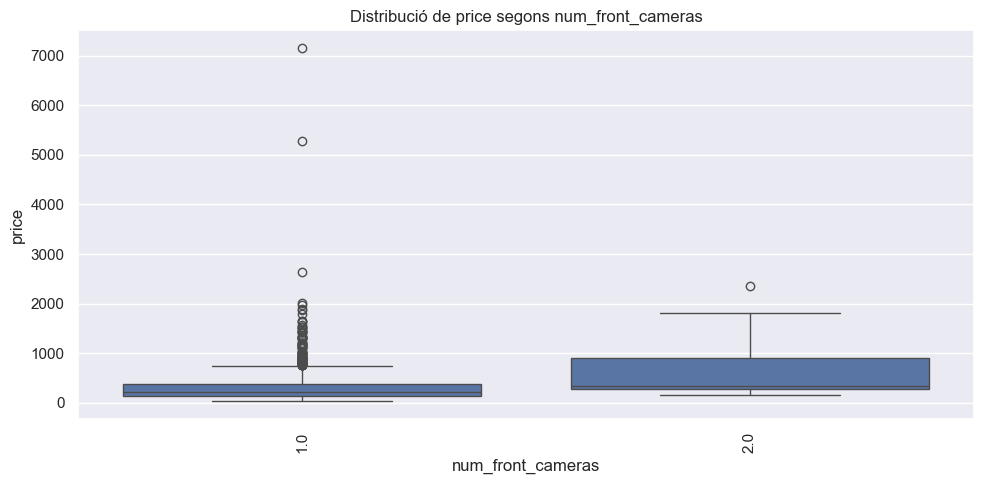

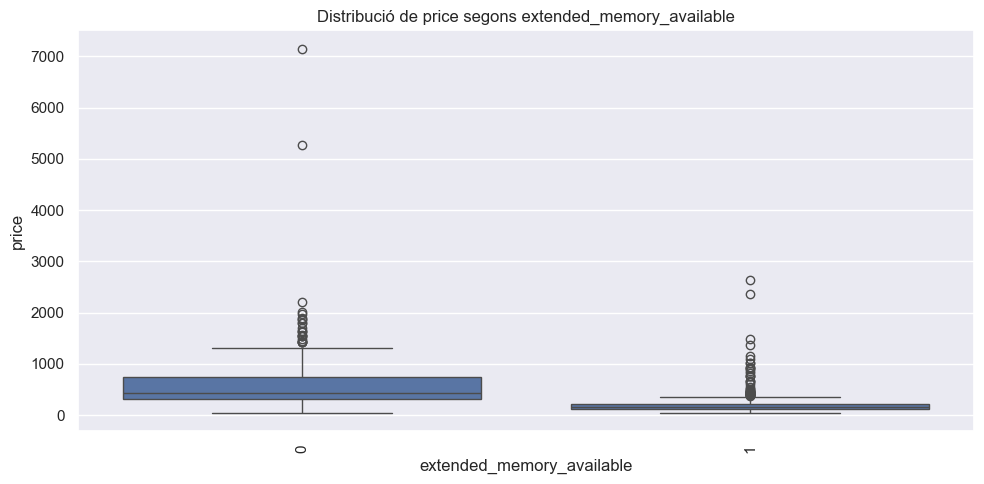

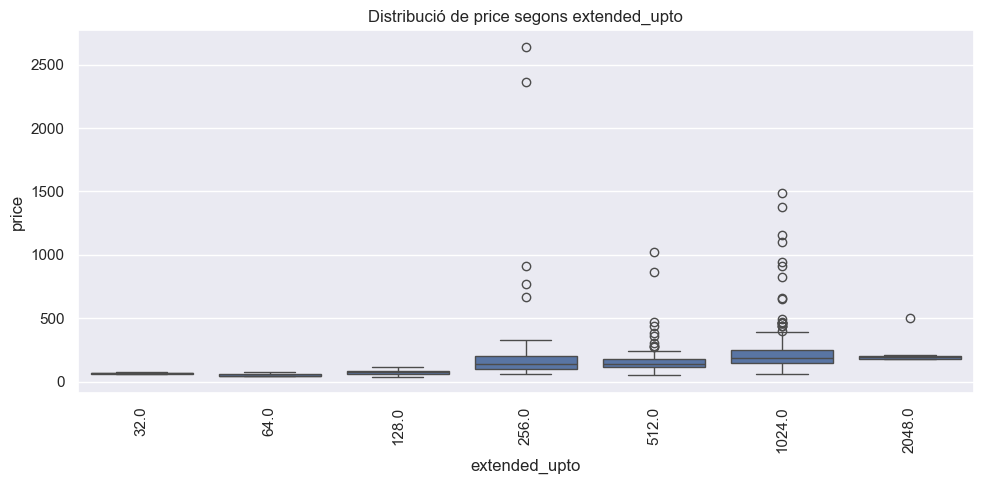

In [18]:
for i, feature in enumerate(categorical_features):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Distribució de price segons {feature}')
    plt.xticks(rotation=90)
    plt.tight_layout()  
    #plt.savefig(f'./plots/boxplots/{feature}.png')  


#### <span style="color:lightgreen"> Correlació entre variables numèriques i variable objectiu </span>

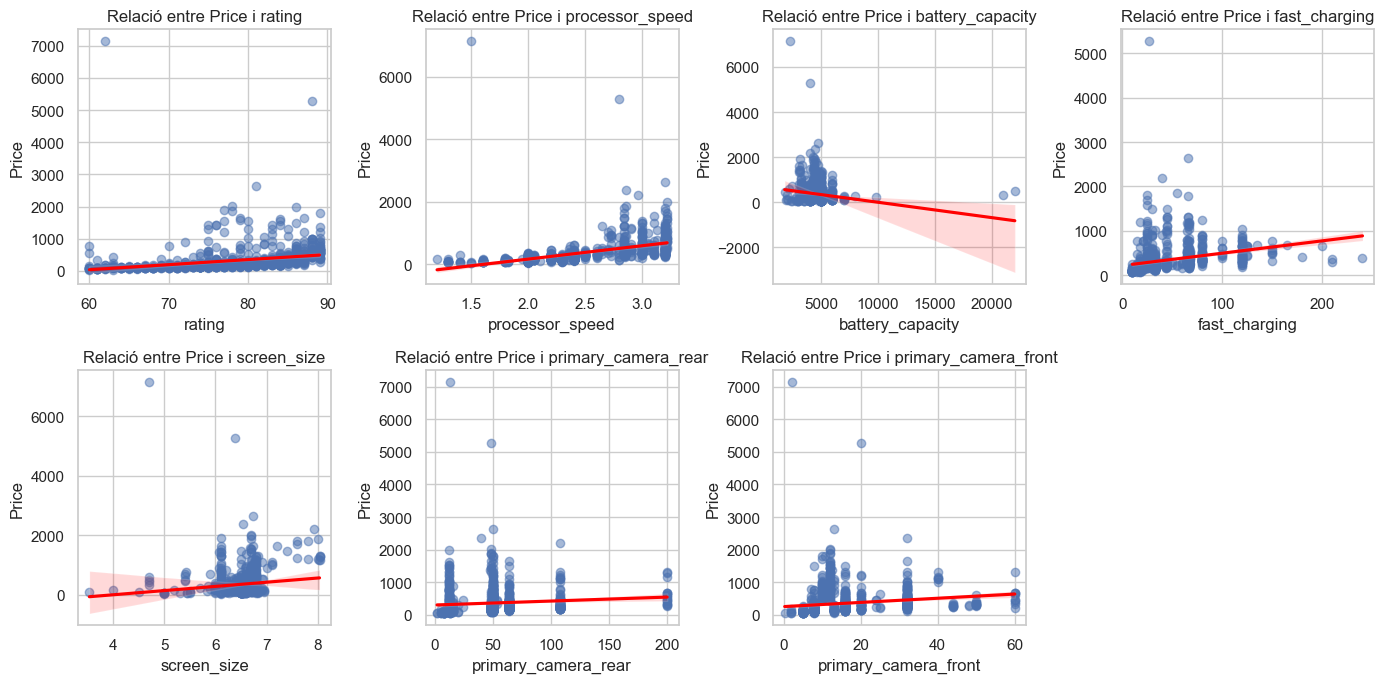

In [19]:
sns.set(style="whitegrid")

num_rows = 2
num_cols =  4

fig, axes = plt.subplots(num_rows, num_cols, figsize = (14, 7))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.regplot(x=feature, y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={"color": "red"}, ax=axes[i])  # alpha para transparencia de puntos
    axes[i].set_title(f'Relació entre Price i {feature}')  
    axes[i].set_xlabel(feature) 
    axes[i].set_ylabel('Price')  

# Eliminar els subplots sobrants
for ax in axes[len(numerical_features):]:
    fig.delaxes(ax)

plt.tight_layout()
#plt.savefig('./plots/numerical_correlations.png')
plt.show()

# 2. Preprocessament

#### <span style="color:lightgreen"> Missings </span>

/var/folders/_q/smcsdf790x717n74_z32l41h0000gq/T/ipykernel_5842/2451523659.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 900x600 with 0 Axes>

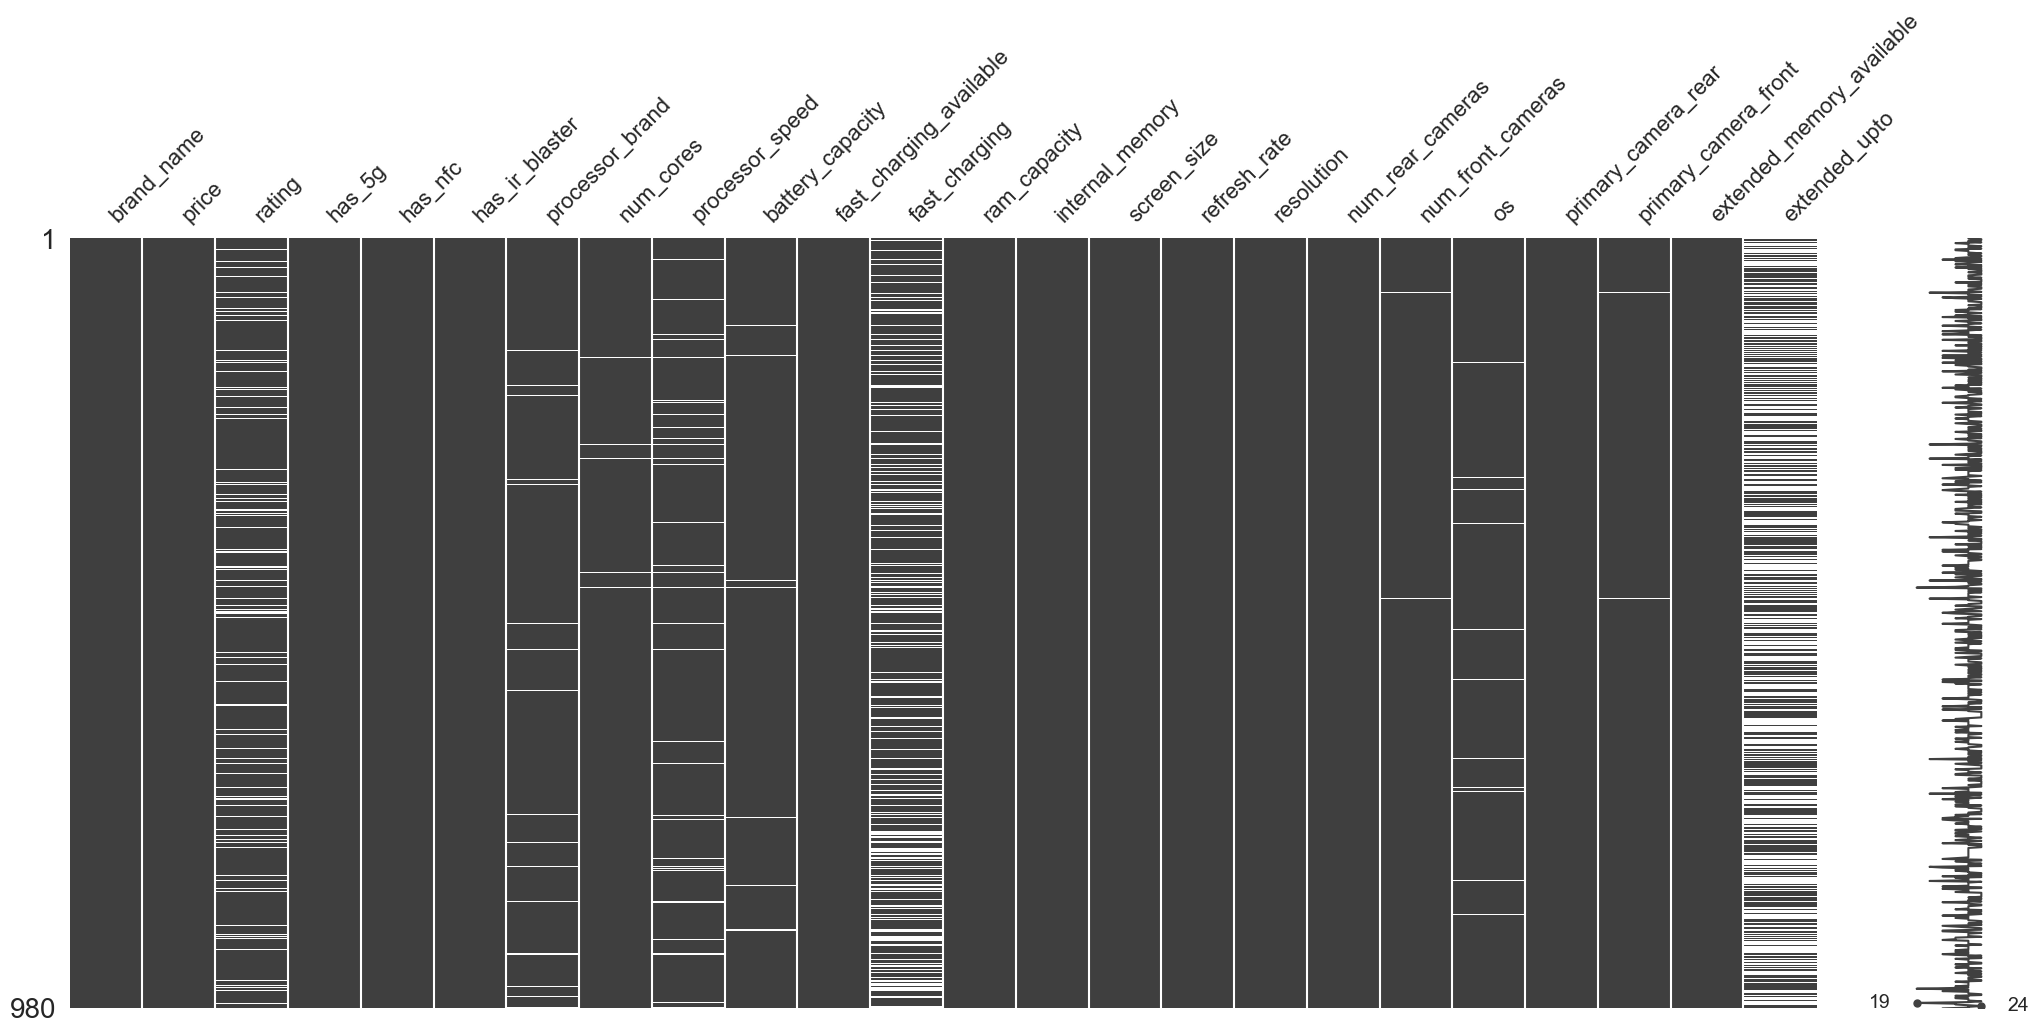

In [20]:
import missingno as msno

plt.figure()
msno.matrix(df)
plt.tight_layout()  
plt.savefig('./plots/missingno_matrix.png')  

In [21]:
def missing_data(data):
    total_missing = data.isna().sum().sort_values(ascending=False)
    percent_missing = round(100 * (data.isnull().sum() / len(data)), 2).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing (%)': percent_missing})
    return missing_data
missing_data(df)

,Total Missing,Percent Missing (%)
extended_upto,480,48.98
fast_charging,211,21.53
rating,101,10.31
processor_speed,42,4.29
processor_brand,20,2.04
os,14,1.43
battery_capacity,11,1.12
num_cores,6,0.61
primary_camera_front,5,0.51
num_front_cameras,4,0.41


Eliminem 'extended_upto' ja que té gairebé un 50% de missings

In [22]:
categorical_features.remove('extended_upto')
df = df.drop('extended_upto', axis=1)

Els altres missings els imputarem un cop particionem el dataset en train i test

#### <span style="color:lightgreen"> Outliers </span>

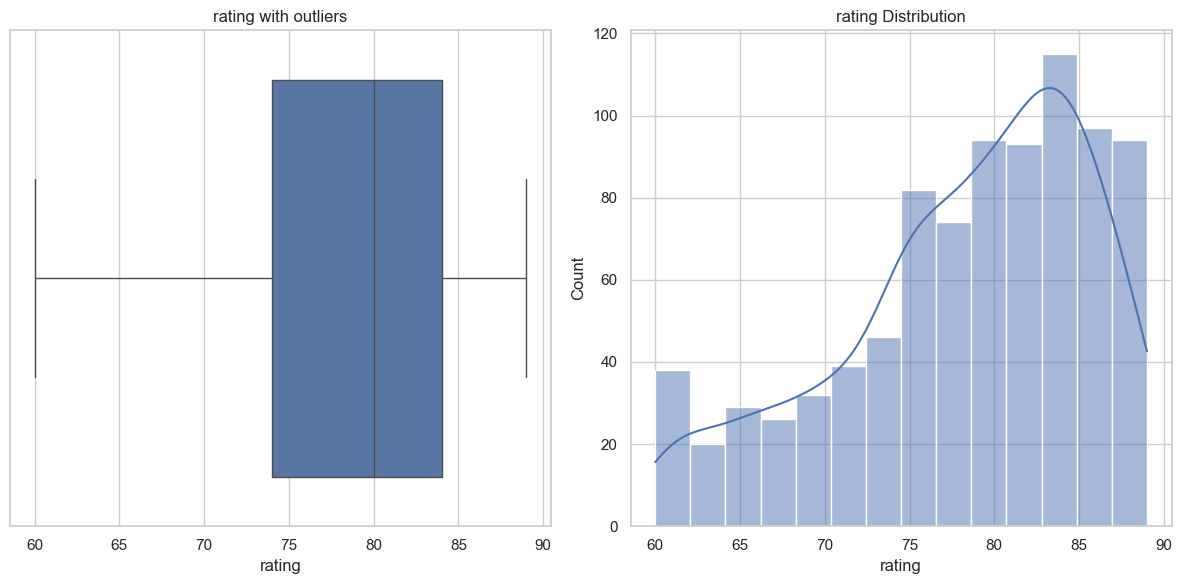

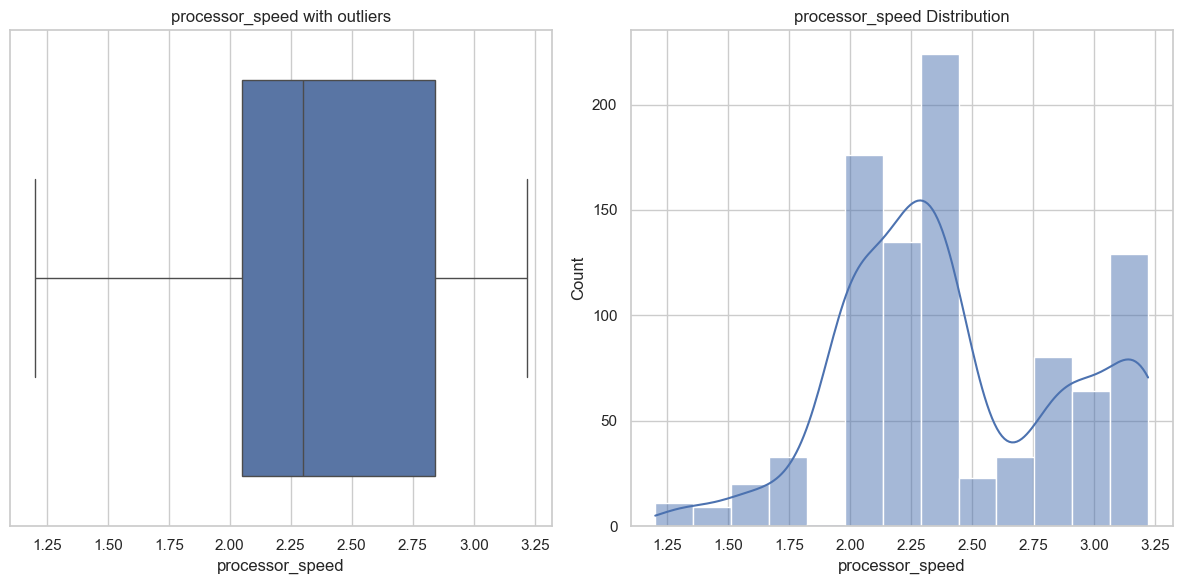

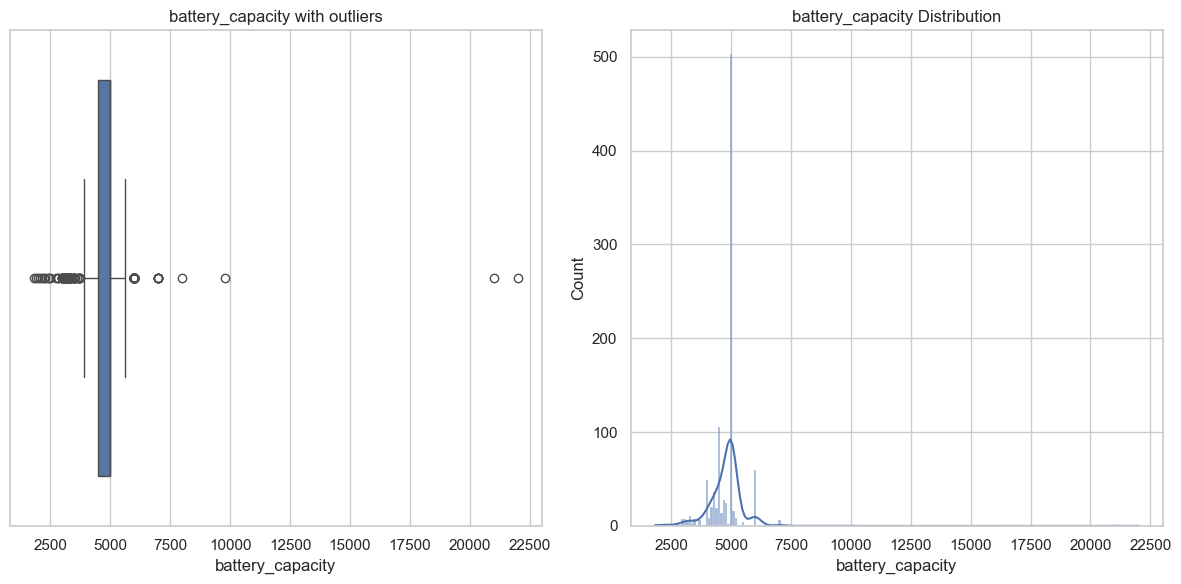

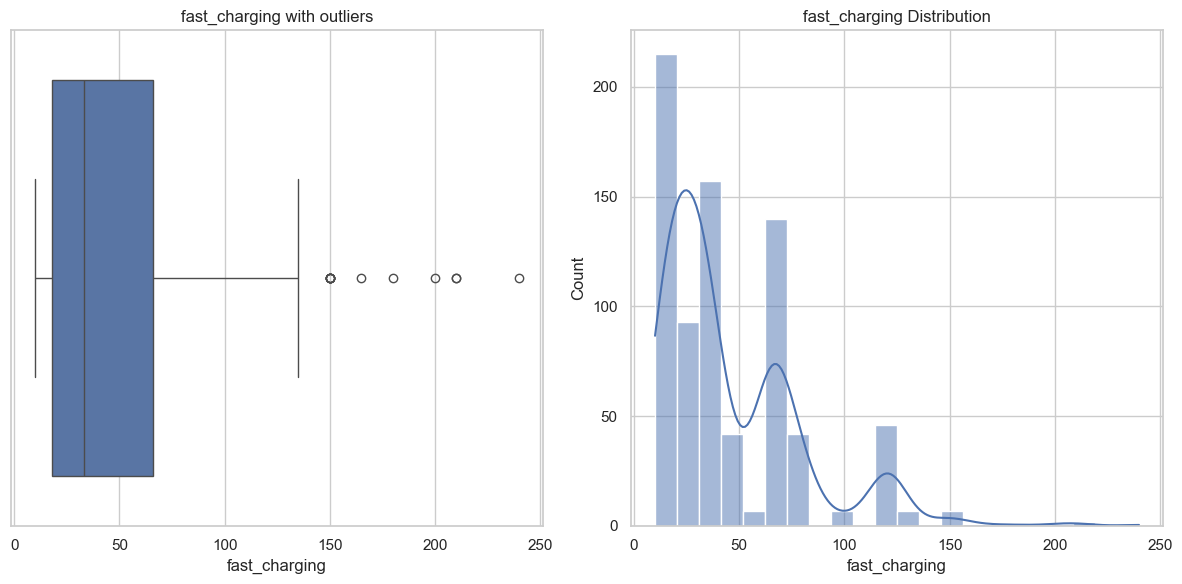

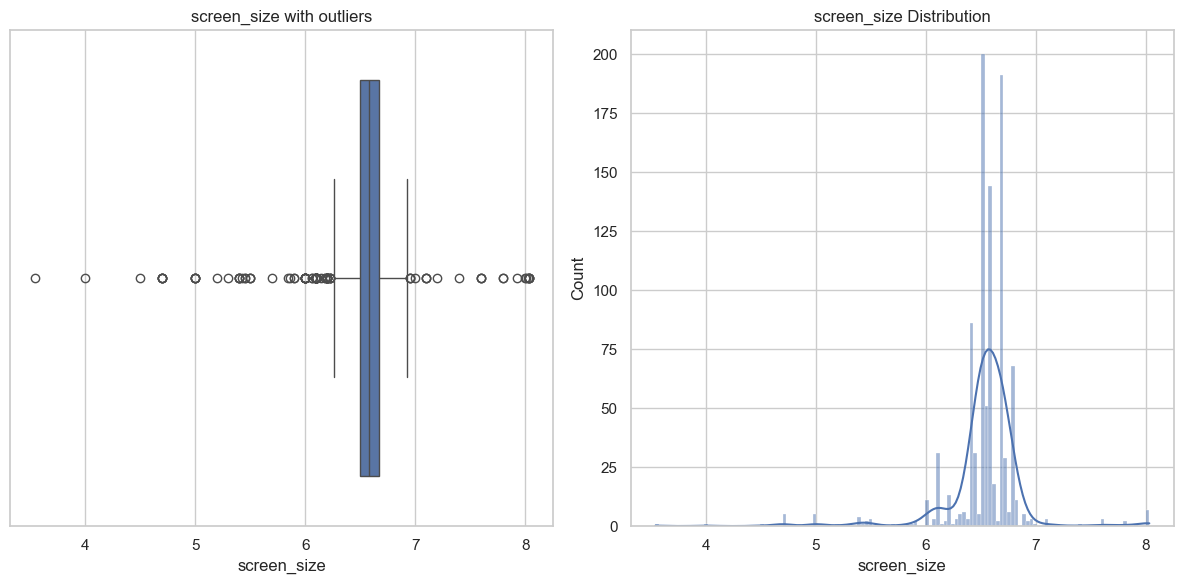

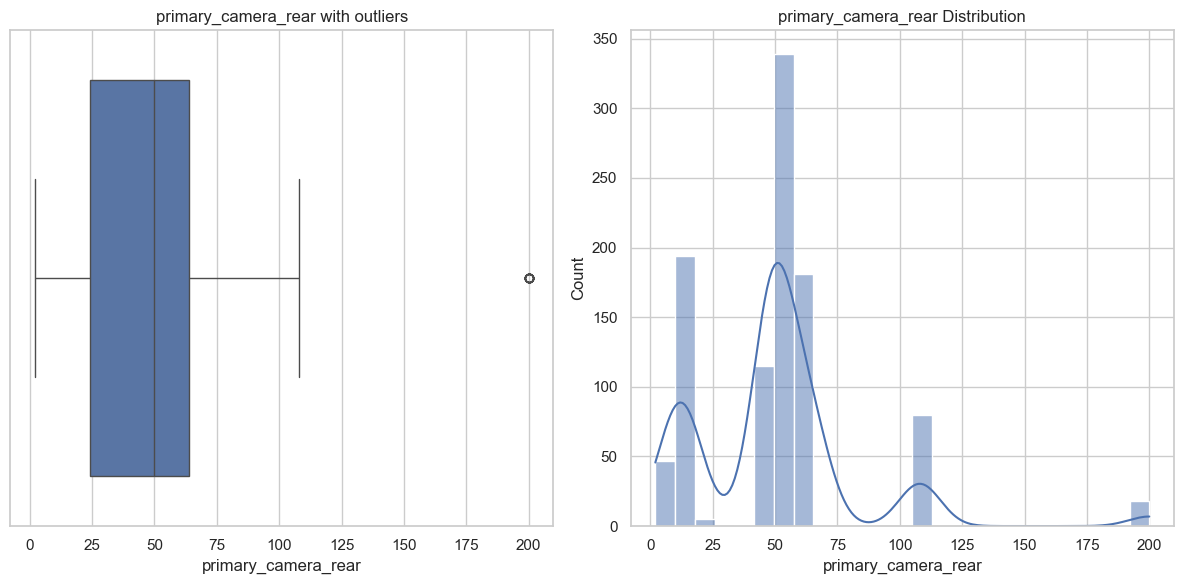

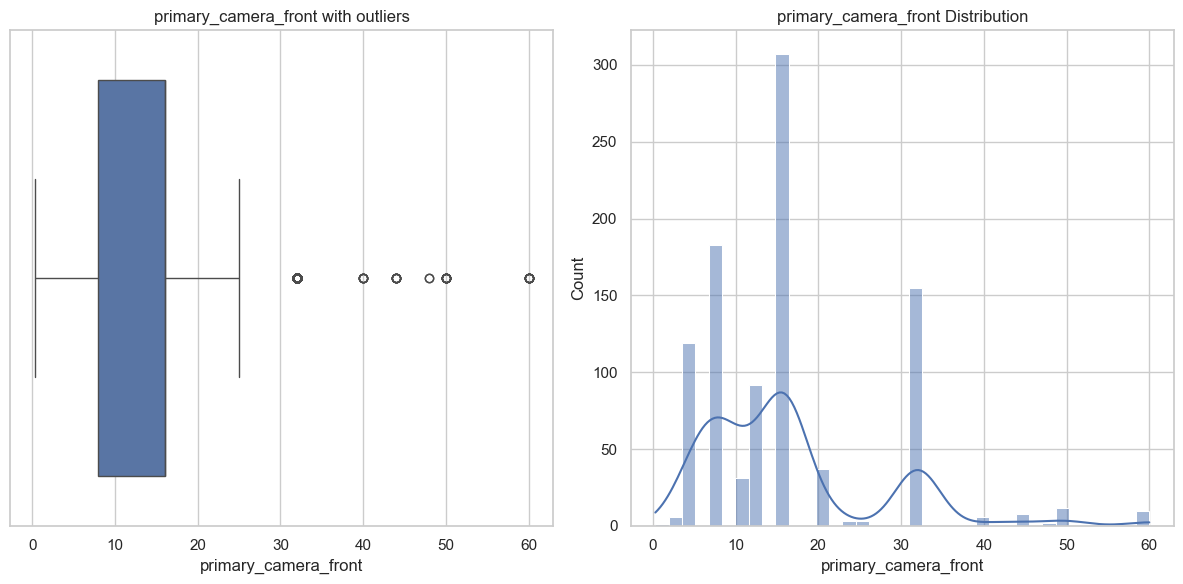

In [23]:
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot
    sns.boxplot(x=df[feature], ax=axes[0])
    axes[0].set_title(f'{feature} with outliers')

    # Plot distribution
    sns.histplot(data=df, x=feature, kde=True, ax=axes[1])
    axes[1].set_title(f'{feature} Distribution')

    plt.tight_layout()
    #fig.savefig(f'./plots/dist_with_outliers/{feature}_with_outliers.png')

Eliminarem els outliers seguint el criteri del Rang Interquartil, excepte la variable objectiu 'price'

Per tant, considerarem outliers:
* Els valors més grans que Q1 - 1.5*IQR
* Els valors més petits que Q3 + 1.5*IQR


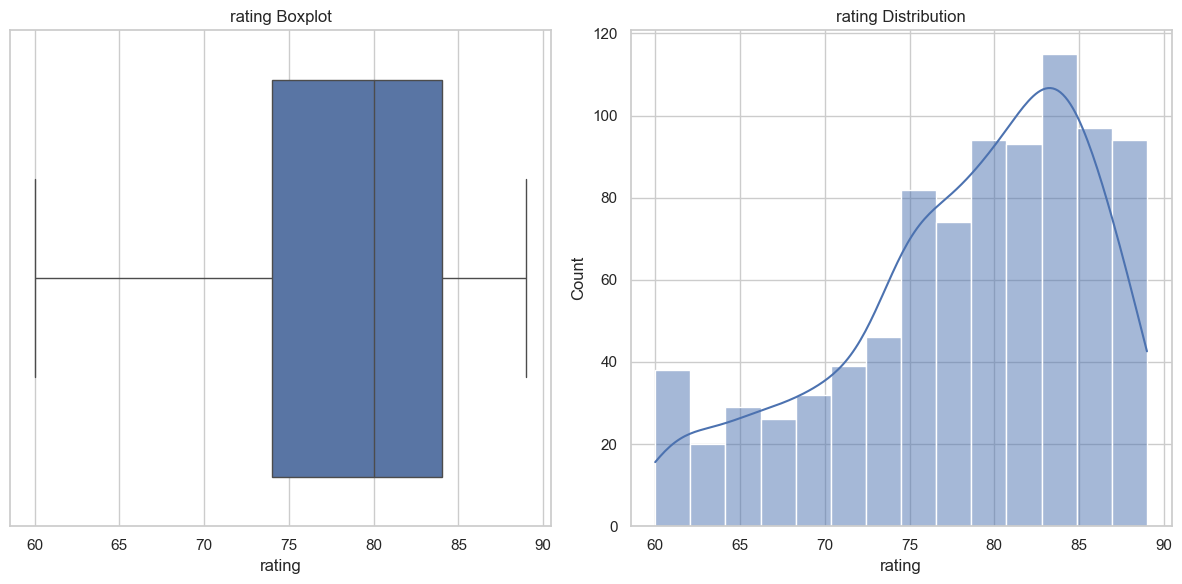

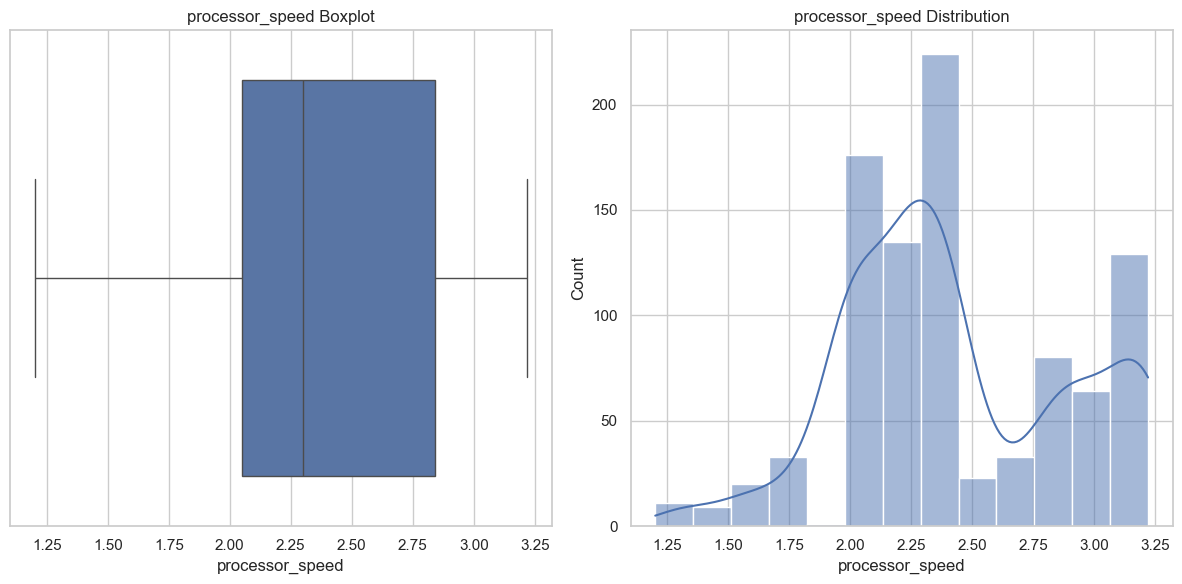

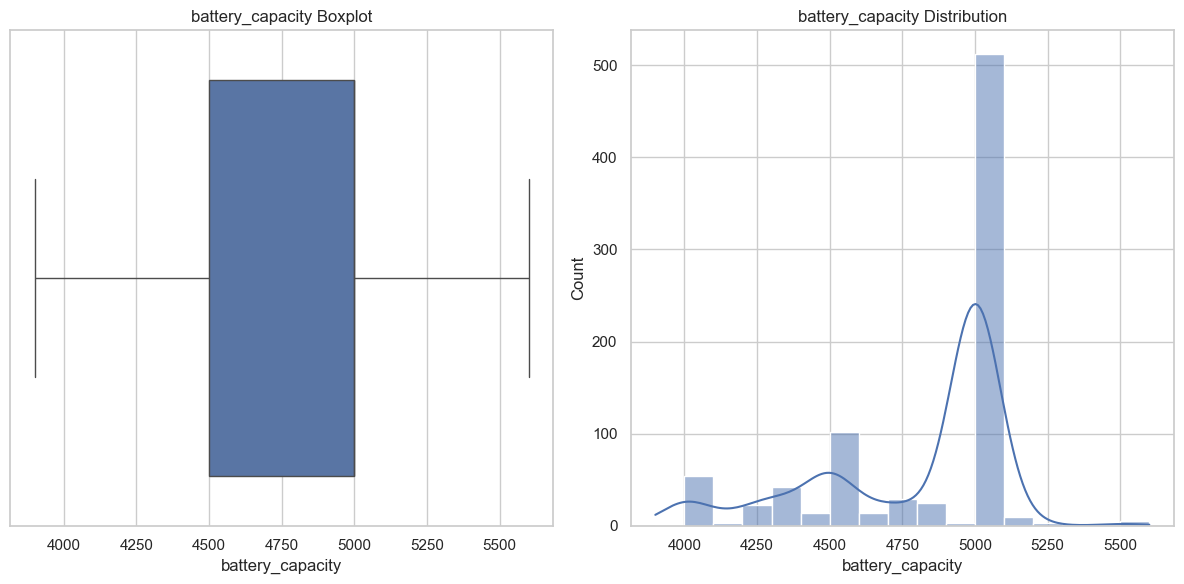

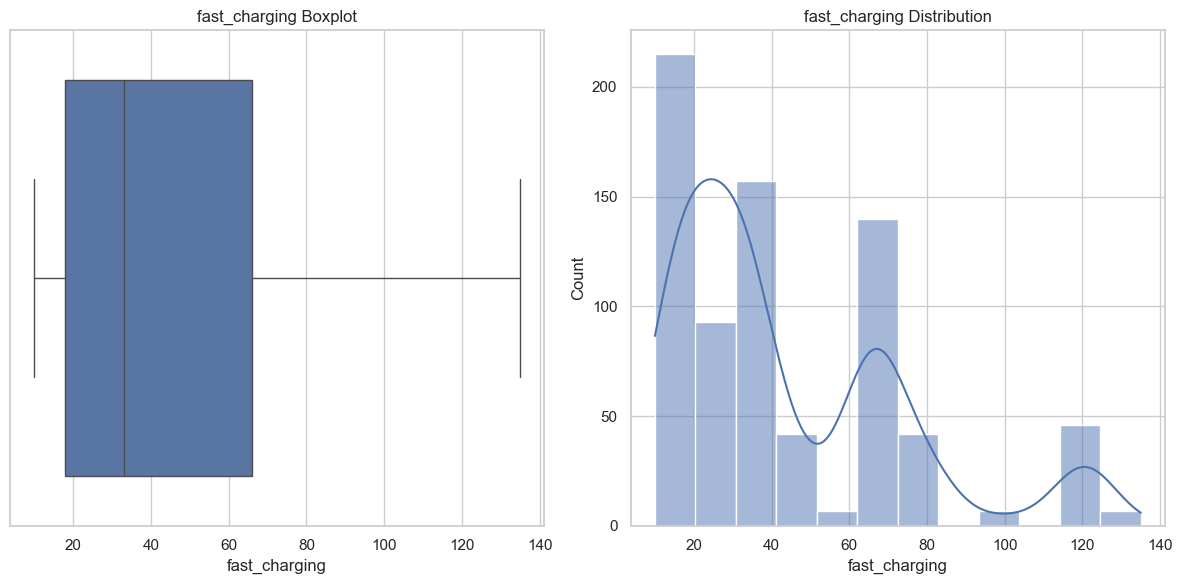

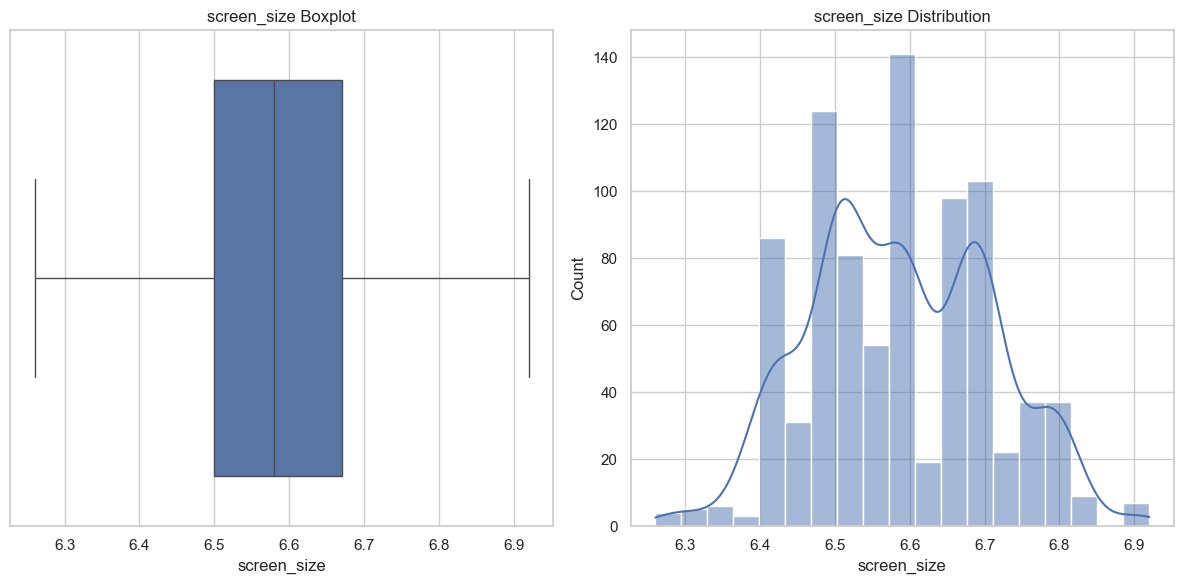

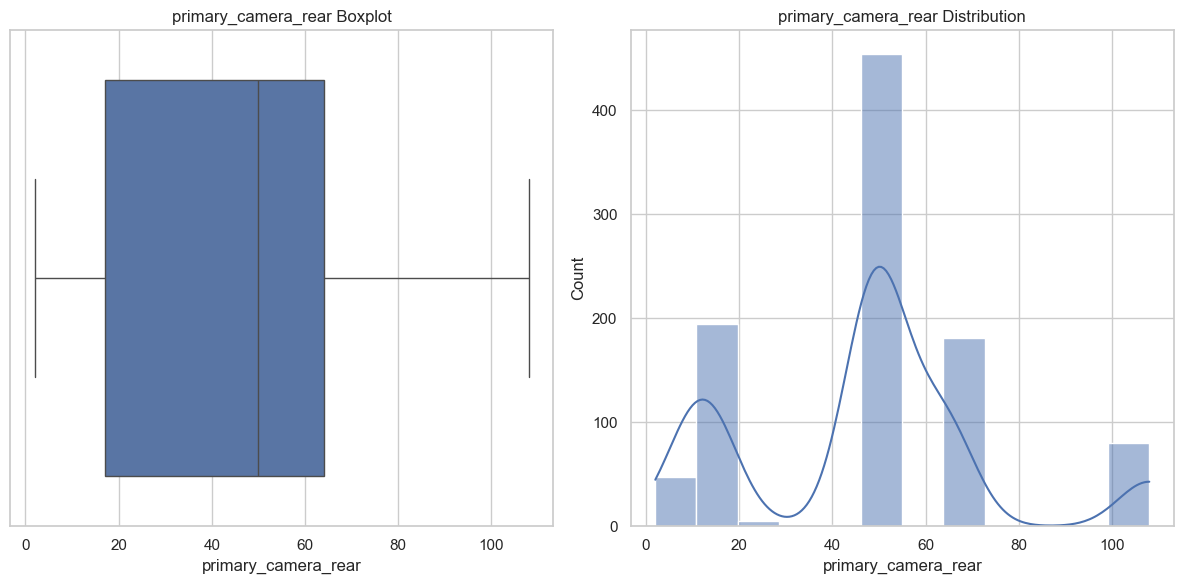

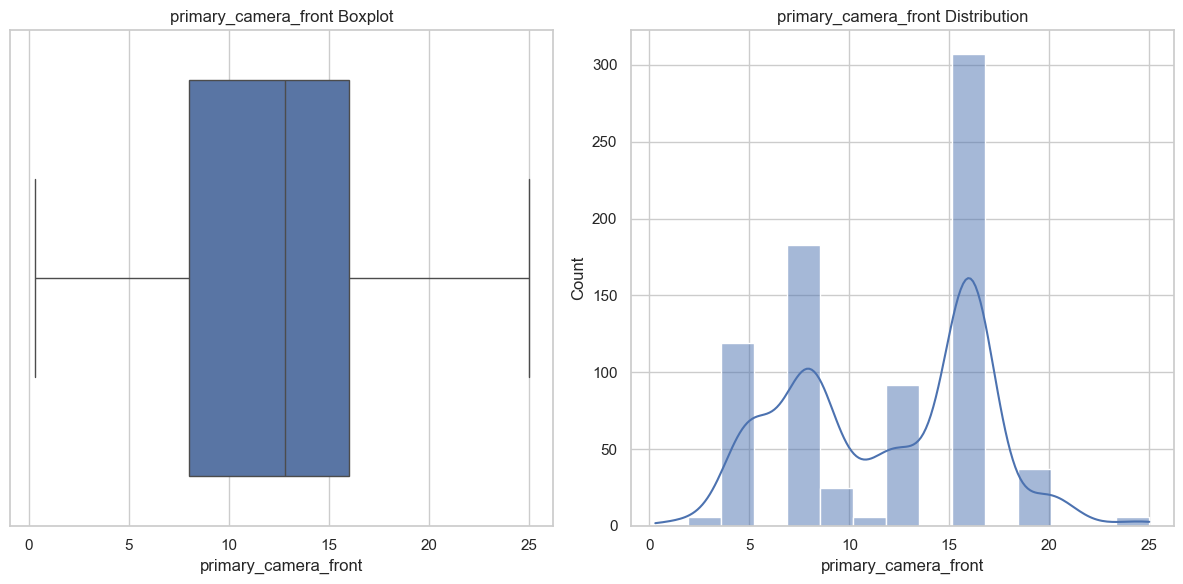

In [24]:
for feature in numerical_features:
    # Calcular IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Definir el límit inferior i superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df.loc[(df[feature] < lower_bound) | (df[feature] > upper_bound), feature] = np.nan

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot
    sns.boxplot(x=df[feature], ax=axes[0])
    axes[0].set_title(f'{feature} Boxplot')

    # Plot distribution
    sns.histplot(data=df, x=feature, kde=True, ax=axes[1])
    axes[1].set_title(f'{feature} Distribution')

    plt.tight_layout()
    #fig.savefig(f'./plots/dist_without_outliers/{feature}_without_outliers.png')

In [25]:
# Eliminar files tal que 'price' es un outlier
Q1 = df['price'].quantile(0.10)
Q3 = df['price'].quantile(0.90)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df.shape

(968, 23)

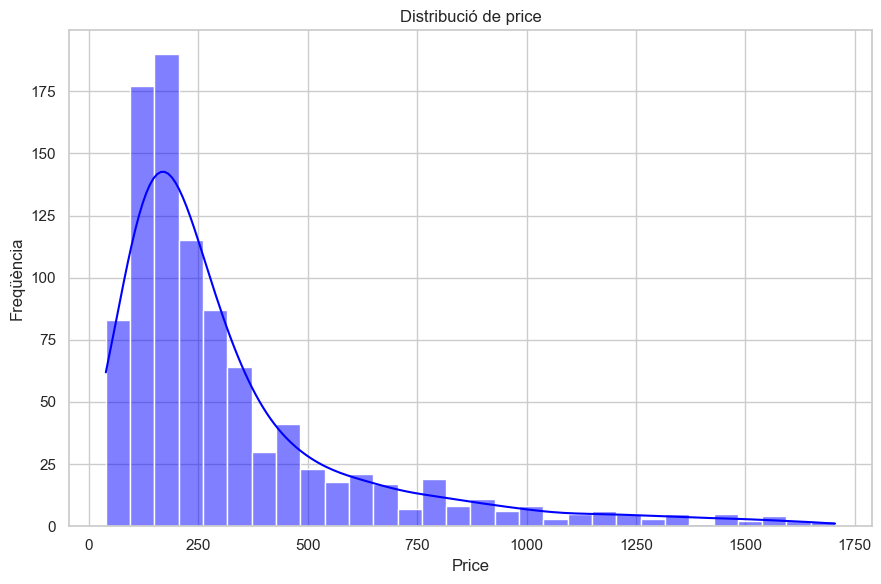

In [26]:
# Visualitzar la distribució de 'price'
plt.figure()
sns.histplot(df['price'], bins = 30, color = 'blue', edgecolor = 'white', kde = True)
plt.title('Distribució de price')
plt.xlabel('Price')
plt.ylabel('Freqüència')
plt.tight_layout()
#plt.savefig('./plots/price_distribution.png')

# 3. Remostreig

#### <span style="color:lightgreen"> Partició del dataset en Train i Test </span>

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1) 
y = df['price']

# Dividir el dataset en train y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [28]:
# Mostrar el número d'observacions y features de cada set
sets_df = pd.DataFrame(columns=['Set', 'Number of Observations', 'Number of Features'])
sets_df.loc[len(sets_df)] = ['Train', X_train.shape[0], X_train.shape[1]]
sets_df.loc[len(sets_df)] = ['Test', X_test.shape[0], X_test.shape[1]]

sets_df

,Set,Number of Observations,Number of Features
0,Train,774,22
1,Test,194,22


#### <span style="color:lightgreen"> Imputació de Missings</span>

##### Variables numèriques

In [29]:
missing_before_num = X_train[numerical_features].isnull().sum()
mean_before = X_train[numerical_features].mean()
stderr_before = X_train[numerical_features].sem()
median_before = X_train[numerical_features].median()

In [30]:
from sklearn.impute import KNNImputer

# Crear l'imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Ajustar l'imputador a les característiques numèriques de les dades d'entrenament i transformar-les
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])

# Transformar les característiques numèriques de les dades de prova utilitzant l'imputador ajustat
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

In [31]:
missing_after_num = X_train[numerical_features].isnull().sum()
mean_after = X_train[numerical_features].mean()
stderr_after = X_train[numerical_features].sem()
median_after = X_train[numerical_features].median()

In [32]:
stats_comparison_num = pd.DataFrame({
    'Feature': missing_before_num.index, 
    'Mean (old)': mean_before.values,
    'Mean': mean_after.values,
    'Std_Error (old)': stderr_before.values,
    'Std_Error': stderr_after.values,
    'Median (old)': median_before.values,
    'Median': median_after.values
})
stats_comparison_num

,Feature,Mean (old),Mean,Std_Error (old),Std_Error,Median (old),Median
0,rating,78.210450,77.744703,0.284479,0.276822,80.00,79.80
1,processor_speed,2.413930,2.416972,0.017236,0.016842,2.30,2.30
2,battery_capacity,4788.626687,4776.765633,12.630036,11.246551,5000.00,5000.00
3,fast_charging,43.356784,43.700775,1.198064,1.101546,33.00,33.00
4,screen_size,6.587692,6.591039,0.004548,0.004168,6.58,6.58
5,primary_camera_rear,47.235441,47.022351,0.951520,0.940744,50.00,50.00
6,primary_camera_front,11.935981,12.447468,0.193233,0.161762,13.00,14.00


##### Variables categòriques

In [33]:
# Guardar les dades originals
original_data = X_train.copy()

In [34]:
# Llista amb els noms de les variables categòriques que tenen almenys un missing
cat_features_missings = [feature for feature in categorical_features if X_train[feature].isnull().any()]
print(cat_features_missings)

['processor_brand', 'os', 'num_cores', 'num_front_cameras']


In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_train[categorical_features] = imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = imputer.transform(X_test[categorical_features])

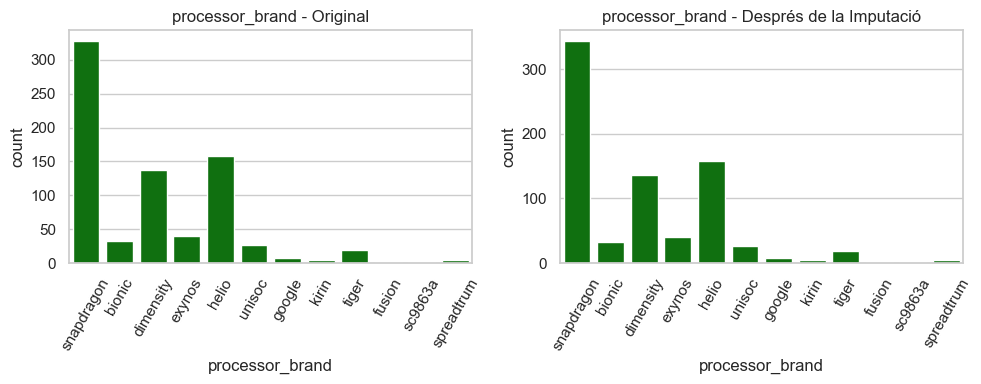

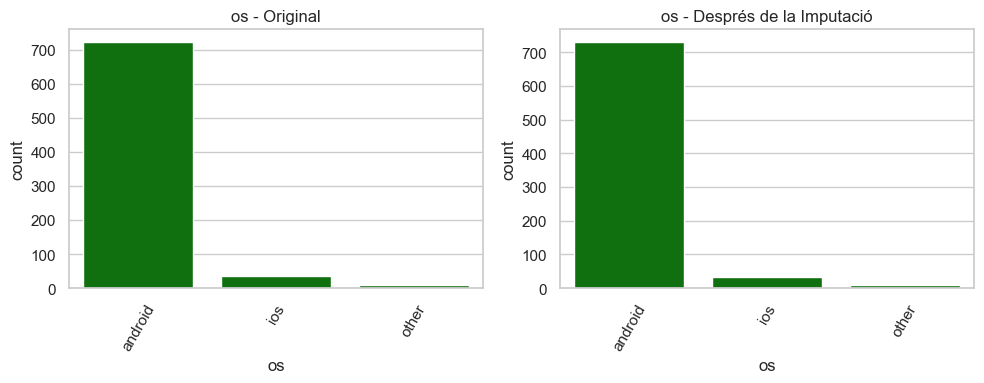

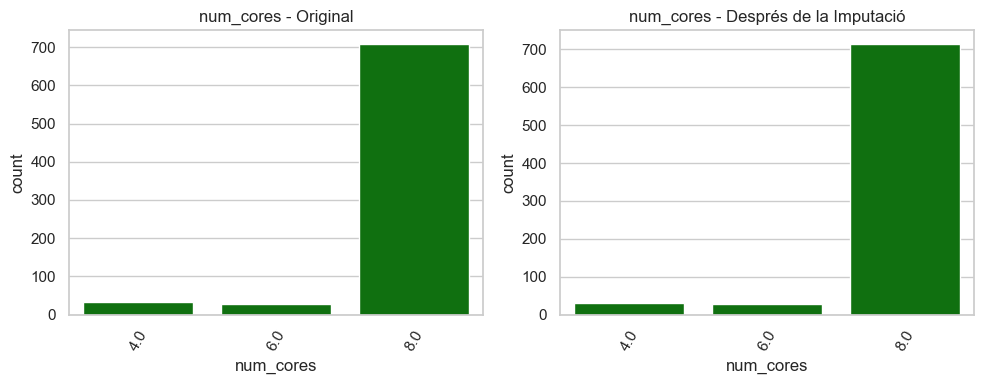

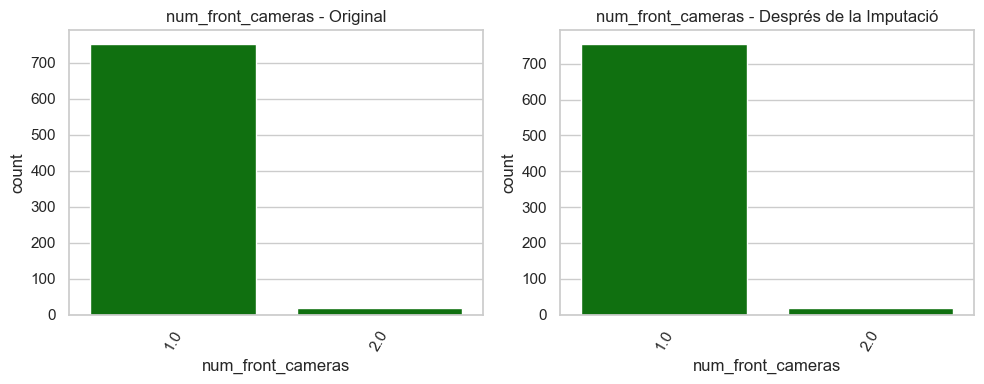

In [36]:
for feature in cat_features_missings:
    plt.figure(figsize=(10, 4))

    # Abans de la imputació (excloïm missings)
    plt.subplot(1, 2, 1)
    filtered_data = original_data[original_data[feature].notna()]
    sns.countplot(data=filtered_data, x=feature, color='green')
    plt.title(f'{feature} - Original')
    plt.xticks(rotation=60)  

    # Després de la imputació
    plt.subplot(1, 2, 2)
    sns.countplot(data=X_train, x=feature, color='green')
    plt.title(f'{feature} - Després de la Imputació')
    plt.xticks(rotation=60)  
    plt.tight_layout()  
    #plt.savefig(f'./plots/dist_moda/{feature}_moda.png')

#### <span style="color:lightgreen"> Recodificació de variables categòriques </span>

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crear una còpia dels conjunts de dades per no modificar els originals
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Crear el codificador
le = LabelEncoder()

# Obtindre totes les categories úniques per a 'brand_name' i 'processor_brand'
all_brands = pd.concat([X_train['brand_name'], X_test['brand_name']]).dropna().unique()
all_processors = pd.concat([X_train['processor_brand'], X_test['processor_brand']]).dropna().unique()

# One-Hot Encoding per 'brand_name' i 'processor_brand'
for col, all_categories in zip(['brand_name', 'processor_brand'], [all_brands, all_processors]):
    dummies = pd.get_dummies(pd.concat([X_train[col], X_test[col]], axis=0), prefix=col, drop_first=True)
    X_train_encoded = pd.concat([X_train_encoded, dummies.loc[X_train.index]], axis=1)
    X_test_encoded = pd.concat([X_test_encoded, dummies.loc[X_test.index]], axis=1)
    X_train_encoded.drop([col], axis=1, inplace=True)
    X_test_encoded.drop([col], axis=1, inplace=True)

# Codificar les altres columnes categòriques de tipus object
for col in categorical_features:
    if col not in ['brand_name', 'processor_brand'] and X_train_encoded[col].dtype == 'object':
        le.fit(pd.concat([X_train_encoded[col], X_test_encoded[col]])) 
        X_train_encoded[col] = le.transform(X_train_encoded[col])
        X_test_encoded[col] = le.transform(X_test_encoded[col])

In [38]:
X_train_encoded.shape

(774, 76)

#### <span style="color:lightgreen"> Normalització de variables numèriques </span>

In [39]:
from sklearn.preprocessing import StandardScaler

# Crear una còpia dels conjunts de dades per no modificar els originals
X_train_normalized = X_train_encoded.copy()
X_test_normalized = X_test_encoded.copy()

# Crear el normalitzador
scaler = StandardScaler()

# Normalitzar les columnes numèriques
X_train_normalized[numerical_features] = scaler.fit_transform(X_train_normalized[numerical_features])
X_test_normalized[numerical_features] = scaler.transform(X_test_normalized[numerical_features])

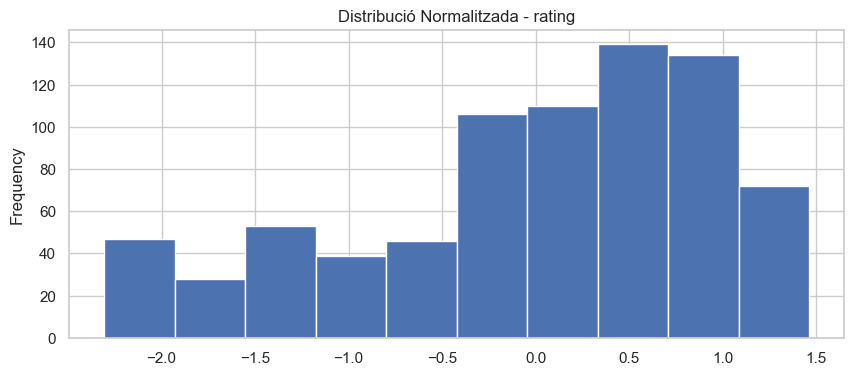

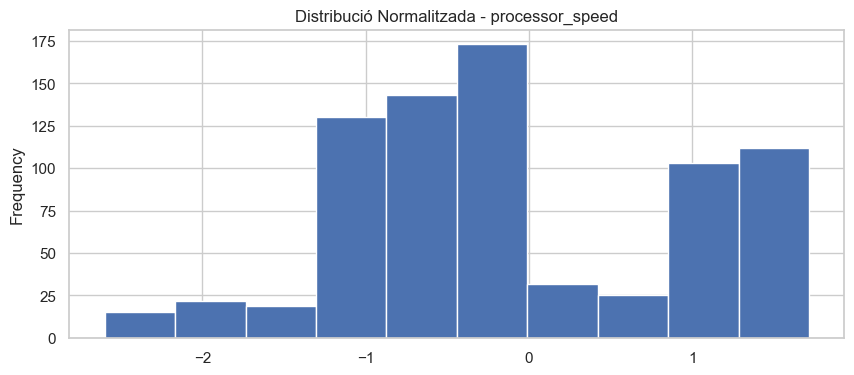

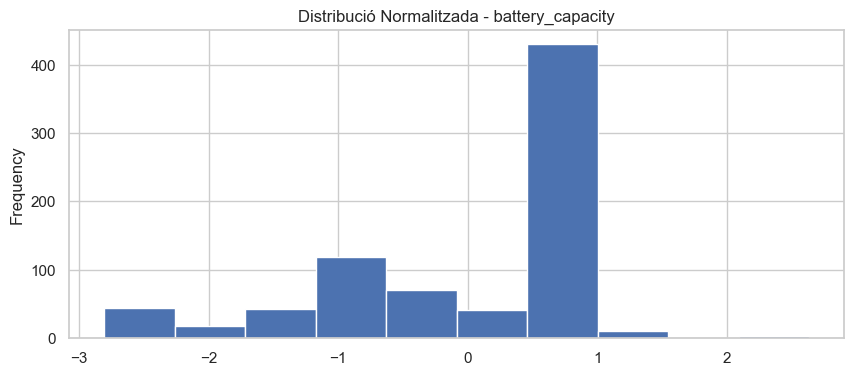

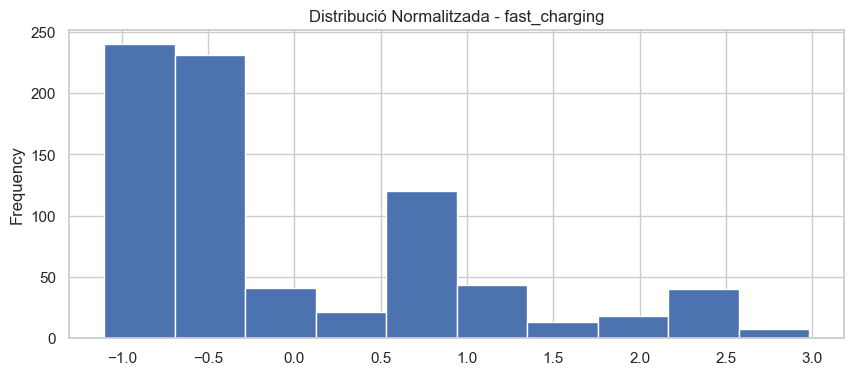

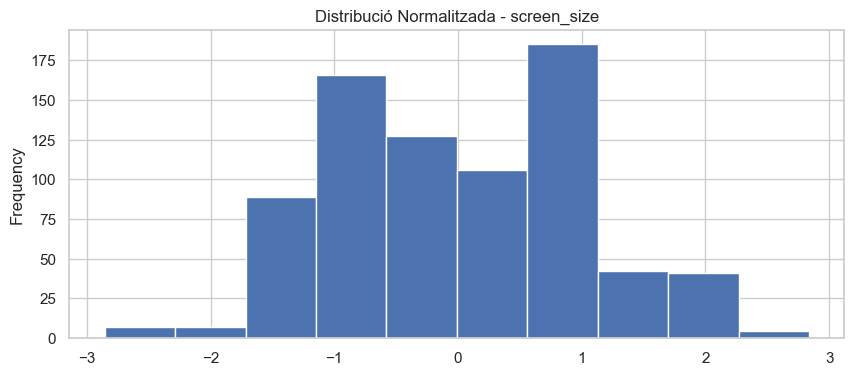

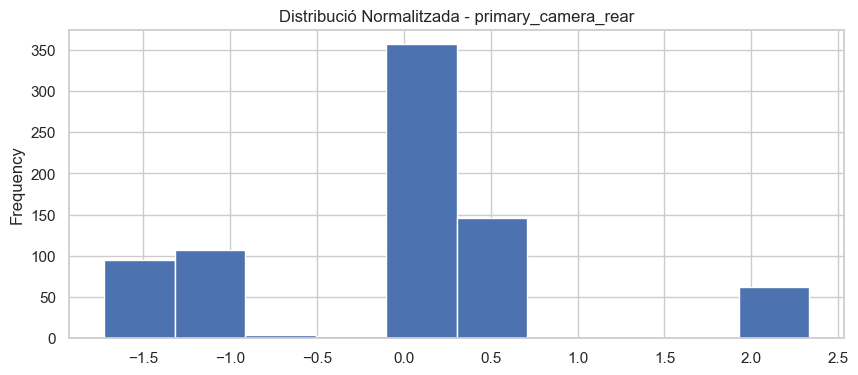

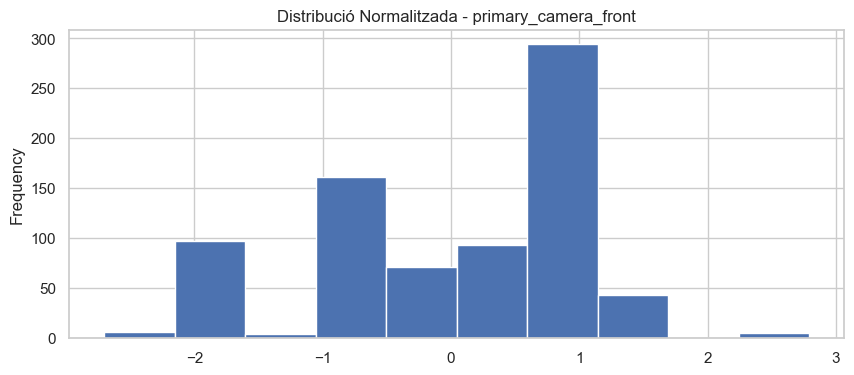

In [40]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    X_train_normalized[feature].plot.hist()
    plt.title(f'Distribució Normalitzada - {feature}')
    #plt.savefig(f'./plots/normalized/{feature}_normalized.png')

#### <span style="color:lightgreen"> CV per avaluar el model </span>

# 4.1 Model Lineal Base

#### <span style="color:lightgreen"> Entrenament i avaluació d'un model de regressió lineal </span>

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Crea el model de regressió lineal
model = LinearRegression()

# Entrena el model
model.fit(X_train_normalized, y_train)

# Fes prediccions amb les dades de prova
y_pred = model.predict(X_test_normalized)

# Avaluar el model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 21450.661325009332
MAE: 106.29735230473119
R²: 0.7447070614726117


#### <span style="color:lightgreen"> Interpretació dels resultats obtinguts (mètriques de classificació, coeficients, etc.) </span>

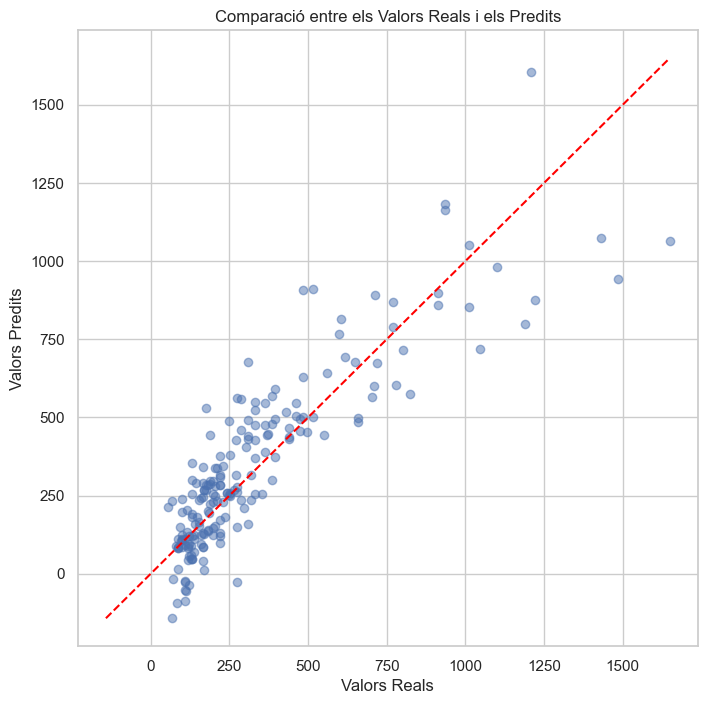

In [42]:
def linearity(model, X, y):
    """
    Funció per visualitzar la linealitat entre els valors predits i els reals.
    """
    # Generar prediccions
    y_pred = model.predict(X)

    # Crear un gràfic de dispersió dels valors reals vs. predits
    plt.figure(figsize=(8, 8))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.title('Comparació entre els Valors Reals i els Predits')
    plt.xlabel('Valors Reals')
    plt.ylabel('Valors Predits')

    # Dibuixar la línia diagonal que representa la perfecta predicció
    max_val = max(np.max(y), np.max(y_pred))
    min_val = min(np.min(y), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    plt.grid(True)
    plt.show()
    
linearity(model, X_test_normalized, y_test)

# 4.2 EXTRA

### Trobar el millor model per aquest problema de regressió mitjançant validació creuada

In [43]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un diccionari de models a avaluar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(max_iter=10000),
    'Lasso Regression': Lasso(max_iter=10000),
    'Random Forest': RandomForestRegressor(),
    'K-Nearest Neighbors': make_pipeline(StandardScaler(), KNeighborsRegressor()) 
}

# Configuració de la validació creuada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Avaluar cada model fent servir el R2 Score
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train_normalized, y_train, cv=kf, scoring='r2')
    results[name] = cv_results.mean()  

# Trobar el model que dona un millor resultat de R2
best_model = max(results, key=results.get)
print("Millor model:", best_model)
print("R2-score de cada model:", results)


Millor model: Random Forest
R2-score de cada model: {'Linear Regression': 0.6931393302651648, 'Ridge Regression': 0.6977001136988082, 'Lasso Regression': 0.6762224323036737, 'Random Forest': 0.8283742152434426, 'K-Nearest Neighbors': 0.7285843147641835}


In [44]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el model
model = RandomForestRegressor(random_state=42)

# Definir els hiperparàmetres a provar
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='r2', verbose=2, n_jobs=-1)

# Ajustar el Grid Search als dades
grid_search.fit(X_train_normalized, y_train)

# Imprimir els millors hiperparàmetres trobats
print(f'Millors hiperparàmetres: {grid_search.best_params_}')
print(f'Millor score: {grid_search.best_score_}')'''

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Definir el model\nmodel = RandomForestRegressor(random_state=42)\n\n# Definir els hiperparàmetres a provar\nparam_grid = {\n    'n_estimators': [100, 200, 300, 400, 500],\n    'max_depth': [None, 10, 20, 30, 40, 50],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\n\n# Crear el Grid Search\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='r2', verbose=2, n_jobs=-1)\n\n# Ajustar el Grid Search als dades\ngrid_search.fit(X_train_normalized, y_train)\n\n# Imprimir els millors hiperparàmetres trobats\nprint(f'Millors hiperparàmetres: {grid_search.best_params_}')\nprint(f'Millor score: {grid_search.best_score_}')"

El codi anterior té un cost computacional molt elevat, per tant, com que els resultats són reproductibles (random_state), els hiperparàmetres òptims obtinguts són els següents:
-  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

En cas que es vulgui executar la cel·la per tal de comprovar-ho, simplement cal descomentar-la.

# 5. Perceptró Multicapa

In [45]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

2024-05-01 19:11:04.276584: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Iteració 1


/Users/pau/Library/Python/3.11/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 - 2s - 208ms/step - loss: 201575.5156 - mean_squared_error: 201575.5156 - val_loss: 181545.8906 - val_mean_squared_error: 181545.8906
Epoch 2/1000
11/11 - 0s - 8ms/step - loss: 199038.6719 - mean_squared_error: 199038.6719 - val_loss: 179219.4062 - val_mean_squared_error: 179219.4062
Epoch 3/1000
11/11 - 0s - 9ms/step - loss: 196730.0938 - mean_squared_error: 196730.0938 - val_loss: 176986.6719 - val_mean_squared_error: 176986.6719
Epoch 4/1000
11/11 - 0s - 11ms/step - loss: 194455.8594 - mean_squared_error: 194455.8594 - val_loss: 174732.2500 - val_mean_squared_error: 174732.2500
Epoch 5/1000
11/11 - 0s - 12ms/step - loss: 192020.7344 - mean_squared_error: 192020.7344 - val_loss: 172351.4062 - val_mean_squared_error: 172351.4062
Epoch 6/1000
11/11 - 0s - 13ms/step - loss: 189451.3750 - mean_squared_error: 189451.3750 - val_loss: 169693.0781 - val_mean_squared_error: 169693.0781
Epoch 7/1000
11/11 - 0s - 11ms/step - loss: 186592.0000 - mean_squared_error: 186592.0000

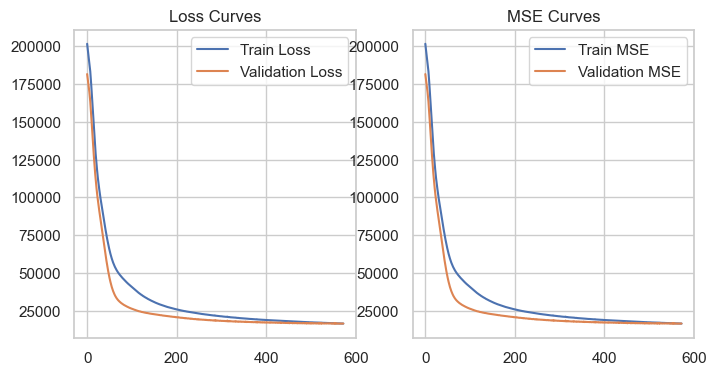

Iteració 2
Epoch 1/1000


/Users/pau/Library/Python/3.11/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 - 2s - 112ms/step - loss: 189766.5781 - mean_squared_error: 189766.5781 - val_loss: 165394.8906 - val_mean_squared_error: 165394.8906
Epoch 2/1000
22/22 - 0s - 6ms/step - loss: 174949.5469 - mean_squared_error: 174949.5469 - val_loss: 147587.1094 - val_mean_squared_error: 147587.1094
Epoch 3/1000
22/22 - 0s - 6ms/step - loss: 152214.9375 - mean_squared_error: 152214.9375 - val_loss: 124684.5391 - val_mean_squared_error: 124684.5391
Epoch 4/1000
22/22 - 0s - 17ms/step - loss: 127708.2969 - mean_squared_error: 127708.2969 - val_loss: 108810.2344 - val_mean_squared_error: 108810.2344
Epoch 5/1000
22/22 - 0s - 7ms/step - loss: 110804.0078 - mean_squared_error: 110804.0078 - val_loss: 94109.9141 - val_mean_squared_error: 94109.9141
Epoch 6/1000
22/22 - 0s - 7ms/step - loss: 96039.3828 - mean_squared_error: 96039.3828 - val_loss: 76795.9375 - val_mean_squared_error: 76795.9375
Epoch 7/1000
22/22 - 0s - 6ms/step - loss: 82580.4219 - mean_squared_error: 82580.4219 - val_loss: 61090.4727 

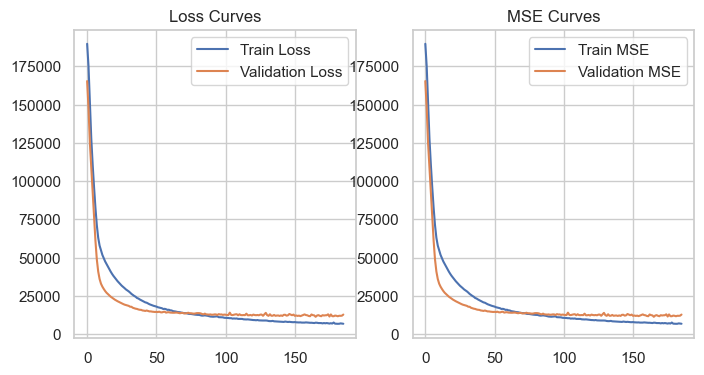

Iteració 3
Epoch 1/1000


/Users/pau/Library/Python/3.11/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 - 3s - 64ms/step - loss: 186017.3281 - mean_squared_error: 186017.3281 - val_loss: 145503.0312 - val_mean_squared_error: 145503.0312
Epoch 2/1000
44/44 - 0s - 6ms/step - loss: 129153.0234 - mean_squared_error: 129153.0234 - val_loss: 95936.0703 - val_mean_squared_error: 95936.0703
Epoch 3/1000
44/44 - 0s - 8ms/step - loss: 83551.4375 - mean_squared_error: 83551.4375 - val_loss: 50163.9922 - val_mean_squared_error: 50163.9922
Epoch 4/1000
44/44 - 0s - 3ms/step - loss: 61737.7891 - mean_squared_error: 61737.7891 - val_loss: 35832.9141 - val_mean_squared_error: 35832.9141
Epoch 5/1000
44/44 - 0s - 4ms/step - loss: 53146.6953 - mean_squared_error: 53146.6953 - val_loss: 30798.9297 - val_mean_squared_error: 30798.9297
Epoch 6/1000
44/44 - 0s - 4ms/step - loss: 47235.3945 - mean_squared_error: 47235.3945 - val_loss: 26892.3359 - val_mean_squared_error: 26892.3359
Epoch 7/1000
44/44 - 0s - 4ms/step - loss: 42374.1797 - mean_squared_error: 42374.1797 - val_loss: 23670.3789 - val_mean_squ

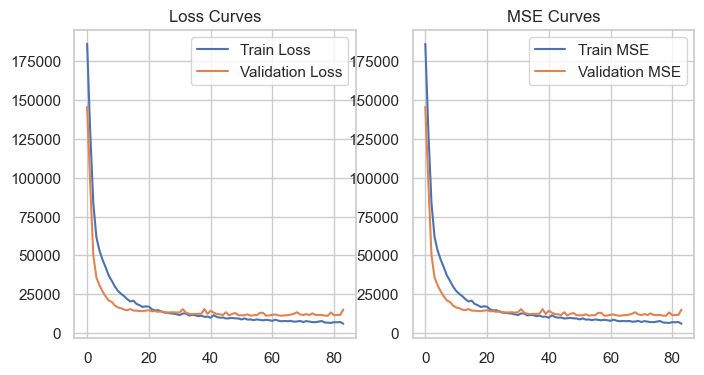

Iteració 4
Epoch 1/1000


/Users/pau/Library/Python/3.11/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


87/87 - 4s - 42ms/step - loss: 155078.1406 - mean_squared_error: 155078.1406 - val_loss: 111208.8438 - val_mean_squared_error: 111208.8438
Epoch 2/1000
87/87 - 0s - 3ms/step - loss: 77549.7031 - mean_squared_error: 77549.7031 - val_loss: 43243.0898 - val_mean_squared_error: 43243.0898
Epoch 3/1000
87/87 - 0s - 4ms/step - loss: 54785.6133 - mean_squared_error: 54785.6133 - val_loss: 29202.3164 - val_mean_squared_error: 29202.3164
Epoch 4/1000
87/87 - 1s - 8ms/step - loss: 45062.4492 - mean_squared_error: 45062.4492 - val_loss: 24983.9863 - val_mean_squared_error: 24983.9863
Epoch 5/1000
87/87 - 0s - 3ms/step - loss: 35758.4961 - mean_squared_error: 35758.4961 - val_loss: 21752.6309 - val_mean_squared_error: 21752.6309
Epoch 6/1000
87/87 - 0s - 4ms/step - loss: 29211.4863 - mean_squared_error: 29211.4863 - val_loss: 17735.5957 - val_mean_squared_error: 17735.5957
Epoch 7/1000
87/87 - 0s - 3ms/step - loss: 24461.3848 - mean_squared_error: 24461.3848 - val_loss: 14857.9902 - val_mean_squar

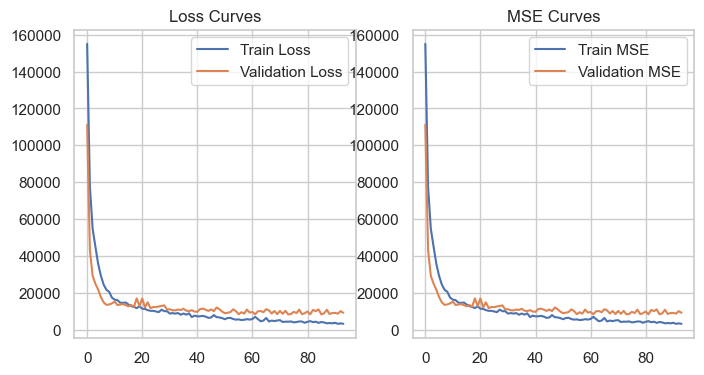

In [46]:
# Funció per construir el model
def build_model(n_layers, n_units, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=(X_train_normalized.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Funció per a visualitzar les corbes d'aprenentatge
def plot_curves(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_squared_error'], label='Train MSE')
    plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
    plt.title('MSE Curves')
    plt.legend()
    plt.show()

# Procés iteratiu
n_iterations = 4
n_units = 64
batch_sizes = [64, 32, 16, 8]

for i in range(n_iterations):
    print(f"Iteració {i+1}")
    model = build_model(i + 1, n_units, learning_rate=0.001)
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(X_train_normalized, y_train, epochs=1000, batch_size=batch_sizes[i], validation_split=0.1, verbose=2, callbacks=[early_stopping])
    
    # Evalua el model
    loss, mse = model.evaluate(X_test_normalized, y_test, verbose=1)
    y_pred = model.predict(X_test_normalized)
    r2 = r2_score(y_test, y_pred.flatten())
    print(f"Test Loss: {loss}, Test MSE: {mse}, R2 Score: {r2}")
    
    # Visualitza les corbes d'aprenentatge
    plot_curves(history)


In [47]:
'''# Defineix l'arquitectura del model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)), 
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Capa de sortida per a regressió
])

# Defineix l'optimitzador i la taxa d'aprenentatge
learning_rate = 0.001  # Taxa més petita per a regressió, per promoure una convergència més suau
optimizer = Adam(learning_rate=learning_rate)

# Compila el model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrena el model
num_epochs = 1000
batch_size = 32  # Batch size més petit per millorar la generalització
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Early stopping per evitar overfitting
history = model.fit(X_train_normalized, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2, callbacks=[early_stopping])

# Avalua el model
loss, mse = model.evaluate(X_test_normalized, y_test)
print("Test Loss:", loss)
print("Test MSE:", mse)

# Fer prediccions amb les dades de prova
y_pred = model.predict(X_test_normalized)

# Calcular i imprimir el R2 score
r2 = r2_score(y_test, y_pred.flatten())  # Assegurar-se que les dimensions coincideixen
print(f"R2 Score: {r2}")

# Funció per a visualitzar les corbes d'aprenentatge
def plot_curves(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_squared_error'], label='Train MSE')
    plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
    plt.title('MSE Curves')
    plt.legend()
    plt.show()

# Visualitza les corbes d'aprenentatge
plot_curves(history)'''

'# Defineix l\'arquitectura del model\nmodel = Sequential([\n    Dense(128, activation=\'relu\', input_shape=(X_train_normalized.shape[1],)), \n    Dense(64, activation=\'relu\'),\n    Dense(32, activation=\'relu\'),\n    Dense(1, activation=\'linear\')  # Capa de sortida per a regressió\n])\n\n# Defineix l\'optimitzador i la taxa d\'aprenentatge\nlearning_rate = 0.001  # Taxa més petita per a regressió, per promoure una convergència més suau\noptimizer = Adam(learning_rate=learning_rate)\n\n# Compila el model\nmodel.compile(optimizer=optimizer, loss=\'mean_squared_error\', metrics=[\'mean_squared_error\'])\n\n# Entrena el model\nnum_epochs = 1000\nbatch_size = 32  # Batch size més petit per millorar la generalització\nearly_stopping = EarlyStopping(monitor=\'val_loss\', patience=10, restore_best_weights=True)  # Early stopping per evitar overfitting\nhistory = model.fit(X_train_normalized, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2, callbacks=[e